In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import BayesianGaussianMixture
from itertools import product 
import plotly.express as px

# EDA

Attributes

- People

  - ID: Customer's unique identifier
  - Year_Birth: Customer's birth year
  - Education: Customer's education level
  - Marital_Status: Customer's marital status
  - Income: Customer's yearly household income
  - Kidhome: Number of children in customer's household
  - Teenhome: Number of teenagers in customer's household
  - Dt_Customer: Date of customer's enrollment with the company
  - Recency: Number of days since customer's last purchase
  - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products

  - MntWines: Amount spent on wine in last 2 years
  - MntFruits: Amount spent on fruits in last 2 years
  - MntMeatProducts: Amount spent on meat in last 2 years
  - MntFishProducts: Amount spent on fish in last 2 years
  - MntSweetProducts: Amount spent on sweets in last 2 years
  - MntGoldProds: Amount spent on gold in last 2 years

- Promotion

  - NumDealsPurchases: Number of purchases made with a discount
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place

  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
df_marketing_campaign = pd.read_csv('datasets/marketing_campaign.csv', sep='\t')

In [3]:
if(pd.options.display.max_columns < df_marketing_campaign.shape[1]):
  pd.options.display.max_columns = df_marketing_campaign.shape[1]

In [4]:
df_marketing_campaign.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_marketing_campaign.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

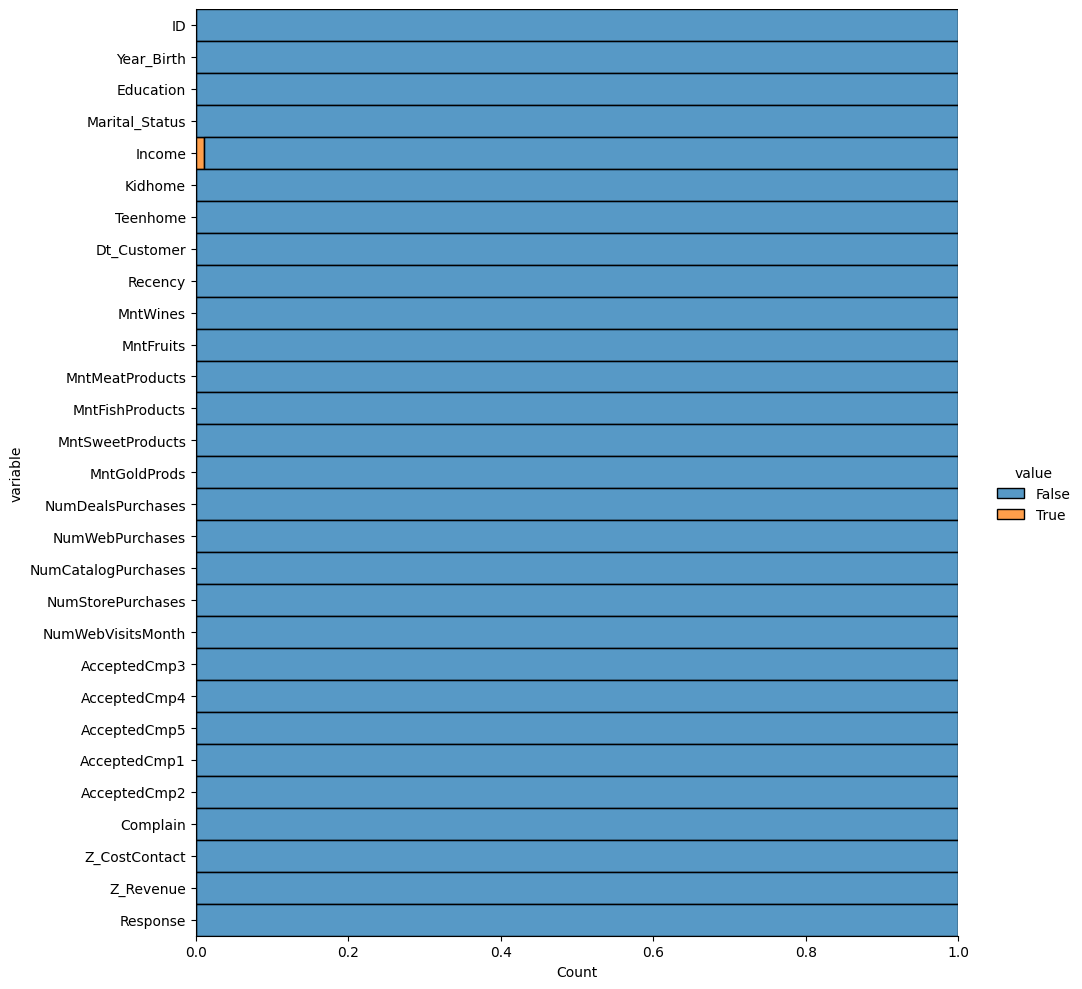

In [7]:
df_marketing_campaign.isna().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            height=10
        )
    )
)
plt.show()

In [8]:
pd.options.display.max_columns = df_marketing_campaign.shape[1]
df_marketing_campaign.describe().T


count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

## Numeric columns

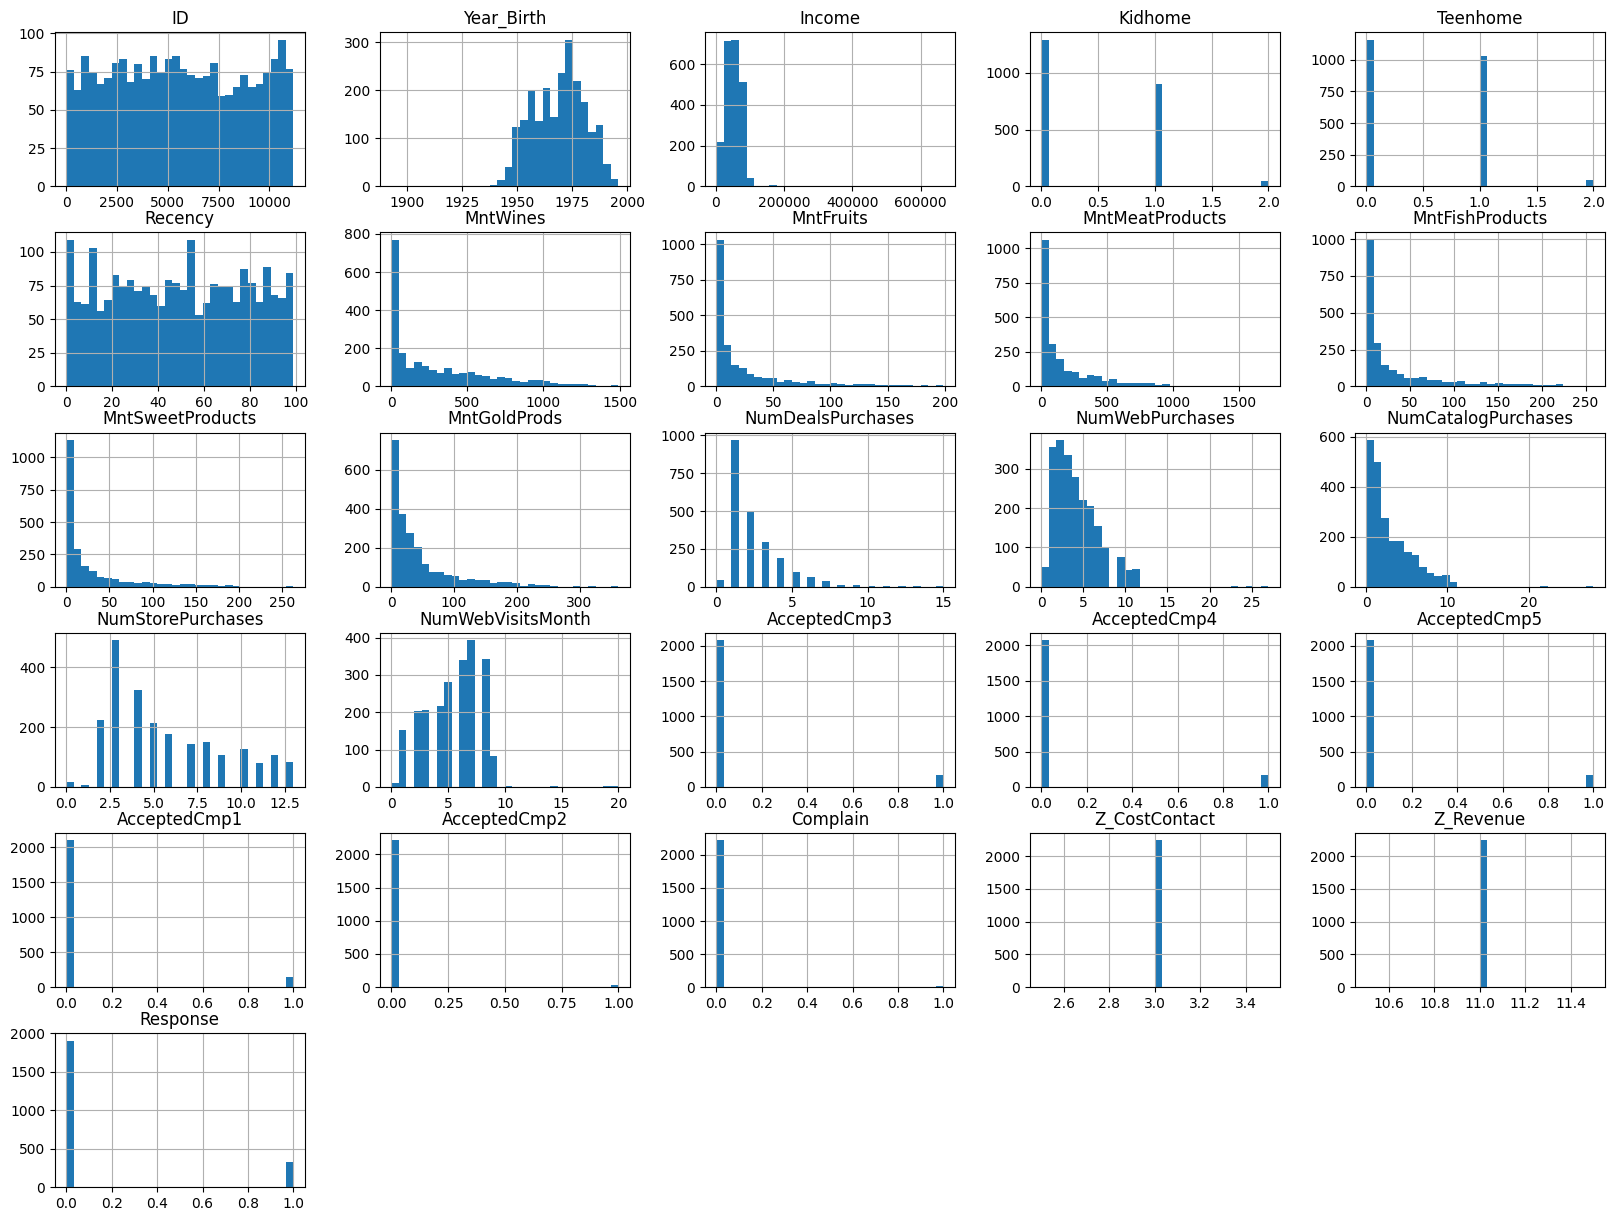

In [9]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

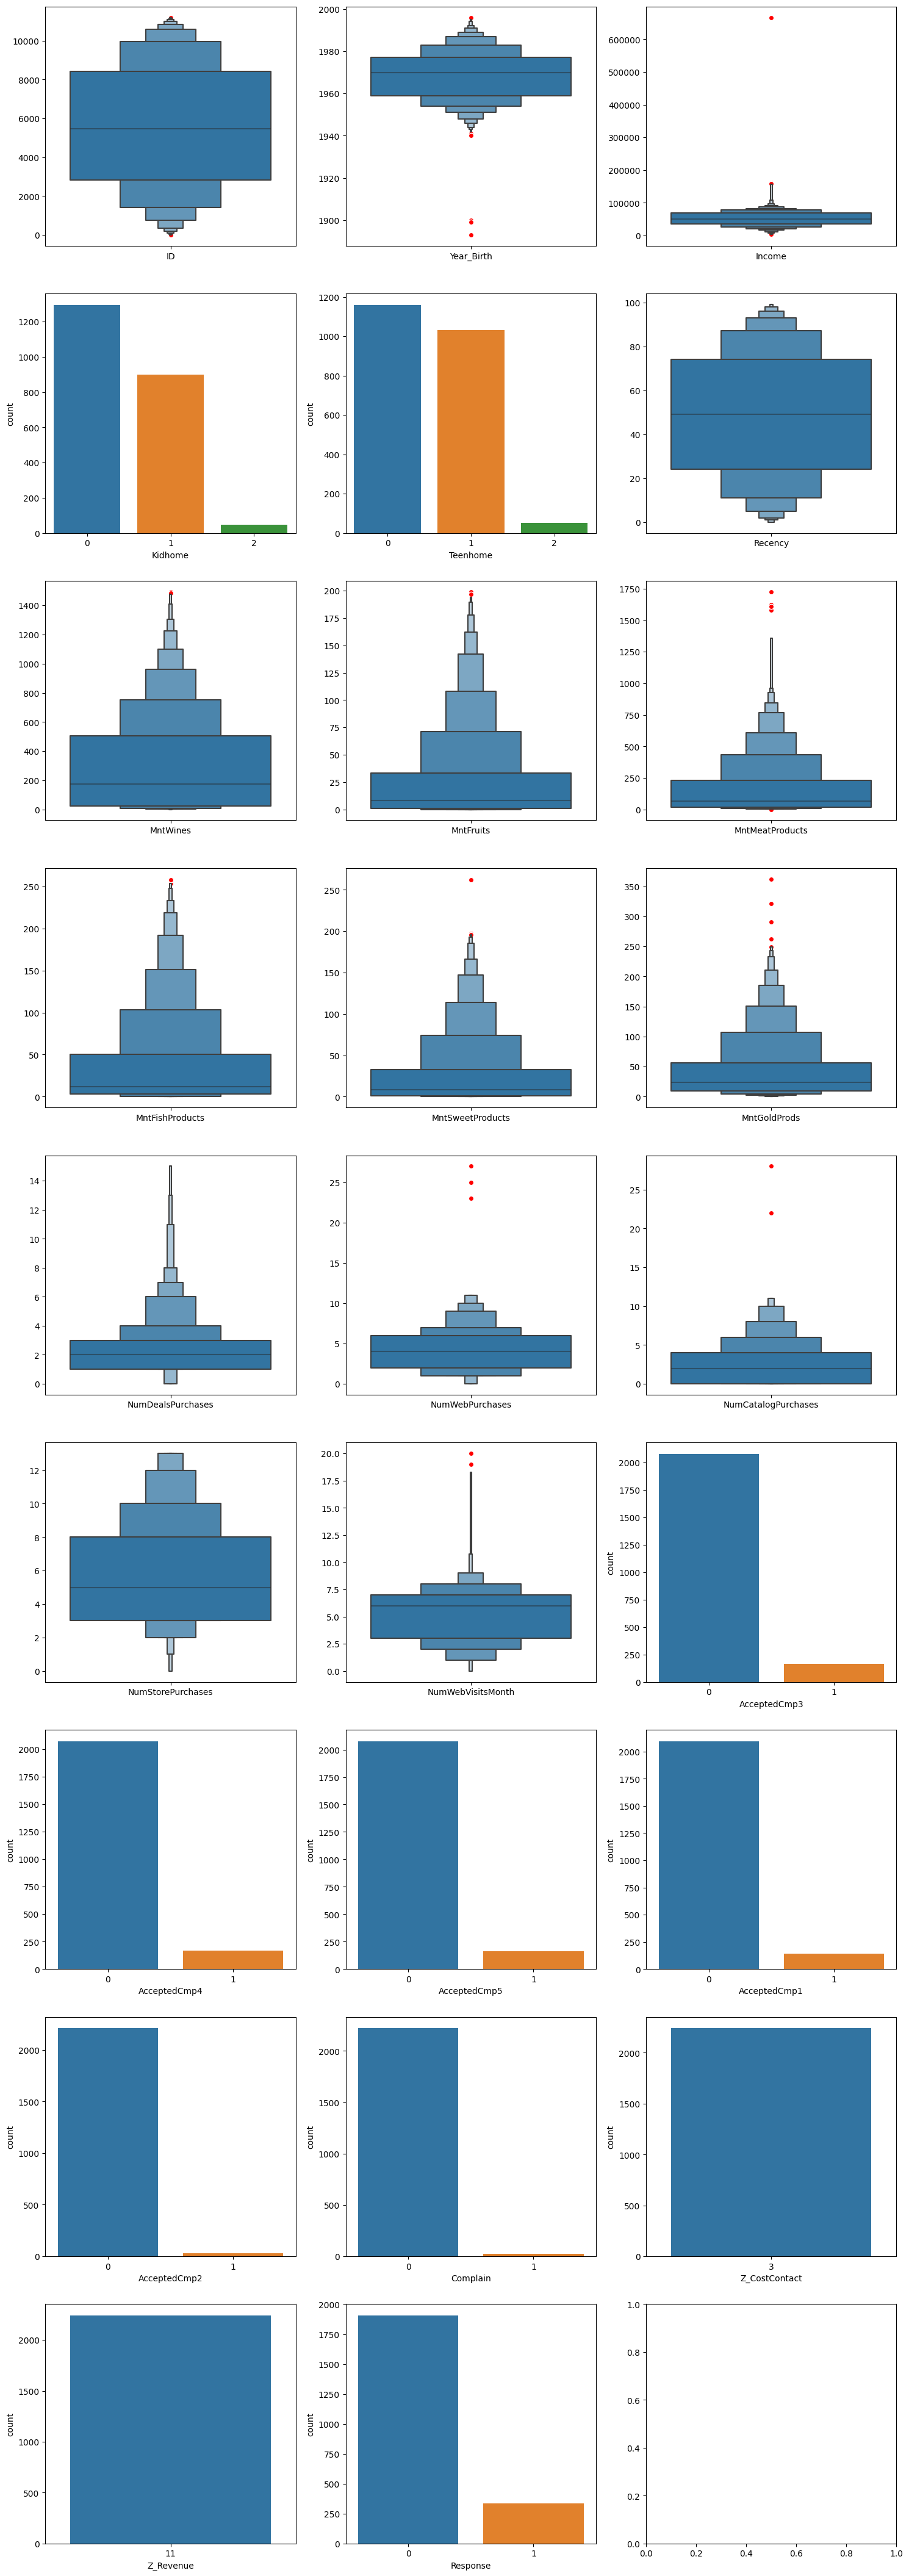

In [10]:
df_marketing_campaign_num = df_marketing_campaign.select_dtypes(include='number')
n_cols =  3
red_circle_boxen = dict(color='red', marker='o', edgecolors='white')
n_rows = int(np.ceil(((df_marketing_campaign_num.shape[1]-1) / n_cols)))
# # Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
# print(fig)
for i, column in enumerate(df_marketing_campaign_num.columns):
       if(len(df_marketing_campaign_num[column].unique()) <= 10):
              # sns.countplot(
              sns.countplot(
                     df_marketing_campaign_num[[column]], 
                     # x = "kmeans_pca2",
                     x = column,
                     # hue="kmeans_pca2", 
                     # multiple="dodge",
                     # stat = 'probability',
                     # common_norm=False,
                     # binwidth=0.4,
                     # fill=True,
                     # palette='coolwarm',
                     ax=axes[i//n_cols,i%n_cols],
                     # warn_singular=False
              )
       else:
              sns.boxenplot(
                     df_marketing_campaign_num[[column]],
                     ax=axes[i//n_cols,i%n_cols],
                     flier_kws=red_circle_boxen
                     # palette='coolwarm',
                     # warn_singular=False
              )

---

List of numeric columns to analyze:
1. Year_birth (also we considerate it as Datetime object)
2. Income
4. MntMeatProducts
5. MntSweetProducts
6. NumWebPurchases
7. NumCatalogPurchases
8. NumWebVisitsMonth
9. Z_CostContact
10. Z_Revenue

---

## Object columns

In [11]:
df_marketing_campaign.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

Dt_customer is a Datetime object

In [12]:
df_marketing_campaign['Dt_Customer'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y')


Education


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


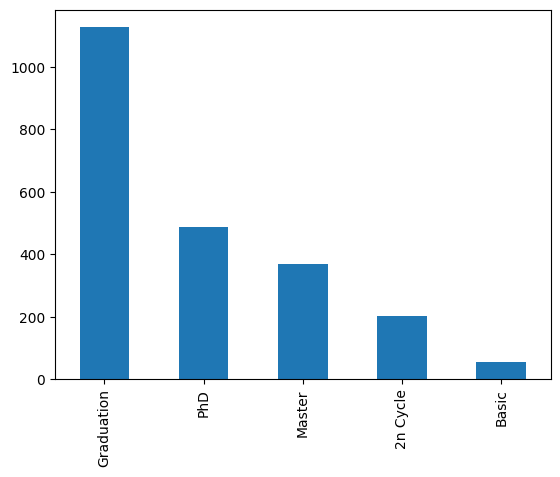



Marital_Status


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


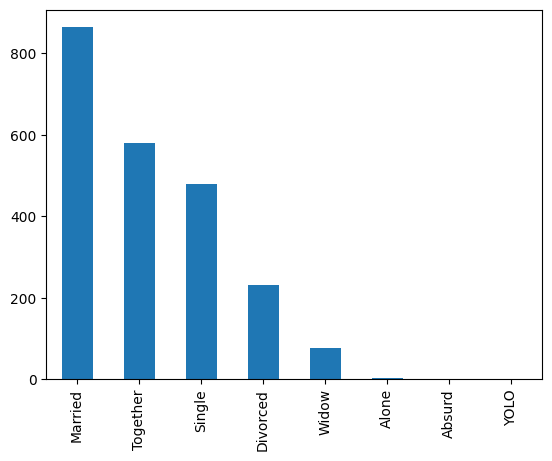

In [13]:
df_marketing_campaign.select_dtypes(include='object').value_counts()

df_marketing_campaign_object = df_marketing_campaign.select_dtypes(include='object')
df_marketing_campaign_object_columns = df_marketing_campaign.select_dtypes(include='object').columns

for col in df_marketing_campaign_object_columns:
  print(col)
  print('\n')
  print(df_marketing_campaign_object[col].value_counts())
  df_marketing_campaign_object[col].value_counts().plot(kind='bar')
  plt.show()
  print('\n')


---

To do in object columns:
1. Ordinal encoder in Education column
2. Drop Absurd and YOLO values, group Alone with Single, and apply One Hot Encoder in Marital_Status column

---

## Datetime column

<AxesSubplot: >

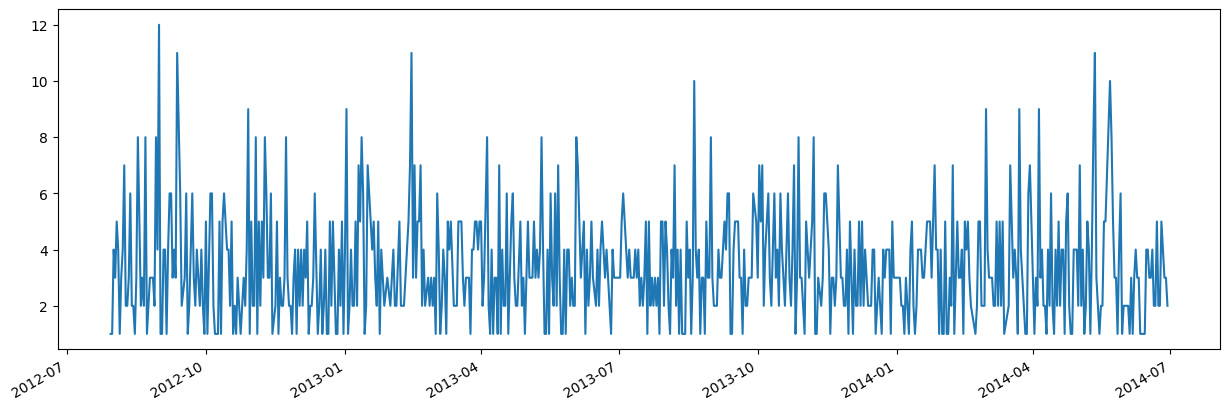

In [14]:
df_marketing_campaign['Dt_Customer'].value_counts().plot(figsize=(15,5))

## Data Cleaning

In [15]:
df_marketing_campaign.describe(include=['object', 'number'])


ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome      Recency     MntWines    MntFruits  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.444196     0.506250    49.109375   303.935714    26.302232   
std        0.538398     0.544538    28.962453   336.597393    39.773434   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000    24.000000    23.750000     1.000000   
50%        0.000000     0.000000    49.000000   173.500000     8.000000   
75%        1.000000     1.000000    74.000000   504.250000    33.000000   
max        2.000000     2.000000    99.000000  1493.000000   199.000000   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count       2240.000000      2240.000000       2240.000000   2240.000000   
unique              NaN              NaN               NaN           NaN   
top                 NaN              NaN               NaN           NaN   
freq                NaN              NaN               NaN           NaN   
mean         166.950000        37.525446         27.062946     44.021875   
std          225.715373        54.628979         41.280498     52.167439   
min            0.000000         0.000000          0.000000      0.000000   
25%           16.000000         3.000000          1.000000      9.000000   
50%           67.000000        12.000000          8.000000     24.000000   
75%          232.000000        50.000000         33.000000     56.000000   
max         1725.000000       259.000000        263.000000    362.000000   

        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         2240.000000      2240.000000          2240.000000   
unique                NaN              NaN                  NaN   
top                   NaN              NaN                  NaN   
freq                  NaN              NaN                  NaN   
mean             2.325000         4.084821             2.662054   
std              1.932238         2.778714             2.923101   
min              0.000000         0.000000             0.000000   
25%              1.000000         2.000000             0.000000   
50%              2.000000         4.000000             2.000000   
75%              3.000000         6.000000             4.000000   
max             15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000000        2240.000000   2240.000000   2240.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
freq                  NaN                NaN           NaN           NaN   
mean             5.790179           5.316518      0.072768      0.0745

### Year_Birth Column

We create a new column to determine if makes sense the age that people had at the moment of enrollment with the company. If not, we drop those rows

<AxesSubplot: >

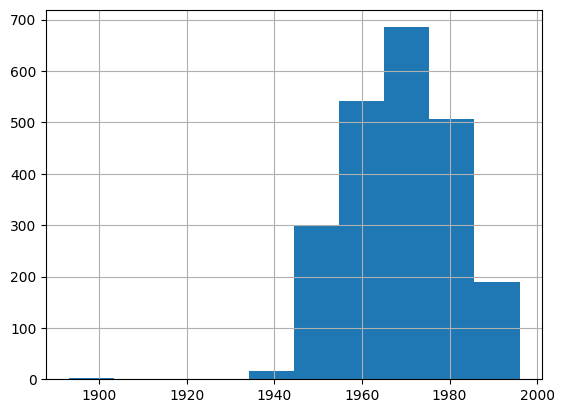

In [16]:
df_marketing_campaign['Year_Birth'].hist()

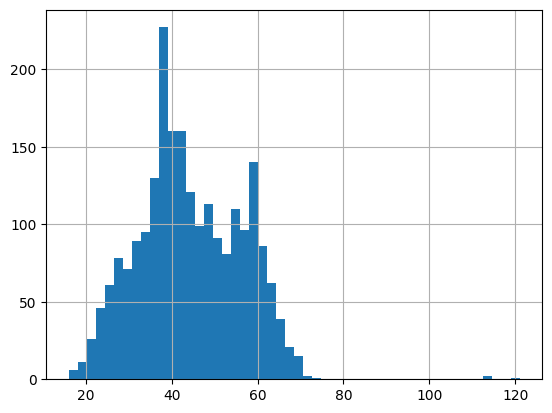

61     36
62     50
63     30
64     32
65     18
66     21
67     12
68      9
69      6
70      9
71      1
72      1
73      1
113     1
114     1
121     1
Name: age_customer_enrollment, dtype: int64


In [17]:
df_marketing_campaign['age_customer_enrollment'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y').dt.year - pd.to_datetime(df_marketing_campaign['Year_Birth'], format='%Y').dt.year

df_marketing_campaign['age_customer_enrollment'].hist(bins=50)
plt.show()
print(df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 60]['age_customer_enrollment'].value_counts().sort_index())

Drop rows where the age of the customer is more than 73

<AxesSubplot: >

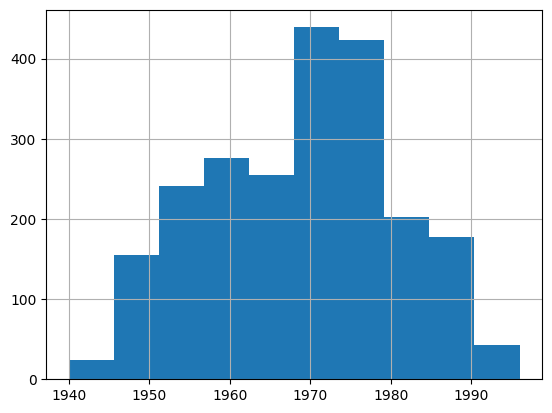

In [18]:
index_to_drop = df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 73].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)
df_marketing_campaign['Year_Birth'].hist()

In [19]:
df_marketing_campaign['Decade_Born'] = ((df_marketing_campaign['Year_Birth']-1900)//10)*10

In [20]:
df_saved_columns = df_marketing_campaign[['Year_Birth', 'age_customer_enrollment']].copy()
df_marketing_campaign.drop(columns=['age_customer_enrollment'], inplace=True)
df_marketing_campaign.drop(columns=['Year_Birth'], inplace=True)

### Income Column

First, we drop the null values that we have only found in the Income column, then we analize for outliers and remove if considered

In [21]:
df_marketing_campaign.dropna(inplace=True)

In [22]:
df_marketing_campaign['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [23]:
df_marketing_campaign['Income'].sort_values(ascending=False).head(15)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
203     102160.0
124     101970.0
650      98777.0
1113     98777.0
Name: Income, dtype: float64

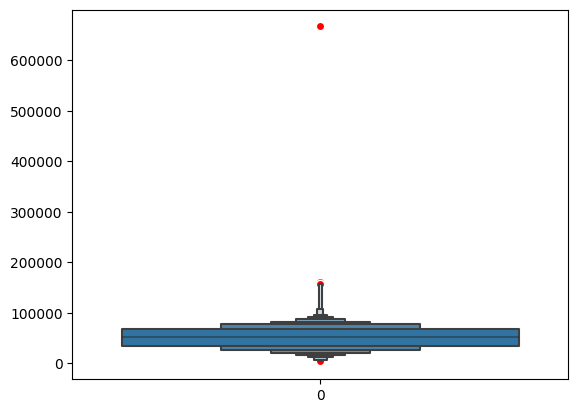

In [24]:
sns.boxenplot(
    df_marketing_campaign['Income'],
    flier_kws=red_circle_boxen
)
plt.show()

In [25]:
index_to_drop = df_marketing_campaign['Income'][df_marketing_campaign['Income'] >= 153000].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

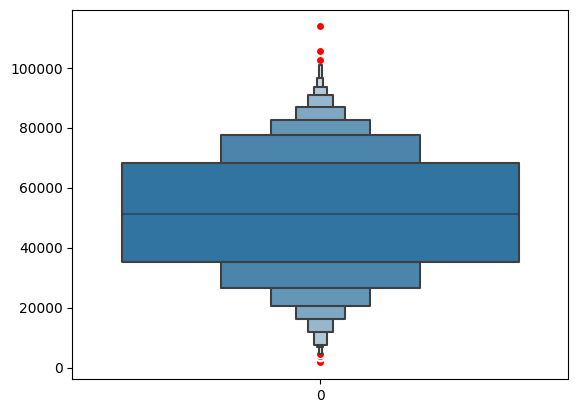

In [26]:
sns.boxenplot(
    df_marketing_campaign['Income'],
    flier_kws=red_circle_boxen
)
plt.show()

### MntMeatProducts Column

Remove outliers

In [27]:
df_marketing_campaign['MntMeatProducts'].describe()

count    2205.000000
mean      165.312018
std       217.784507
min         0.000000
25%        16.000000
50%        68.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [28]:
df_marketing_campaign['MntMeatProducts'].sort_values(ascending=False).head(15)

21      1725
1358     984
1808     981
456      974
2109     968
1031     961
1958     951
126      951
1259     946
561      940
1713     936
1721     935
2010     932
845      929
76       925
Name: MntMeatProducts, dtype: int64

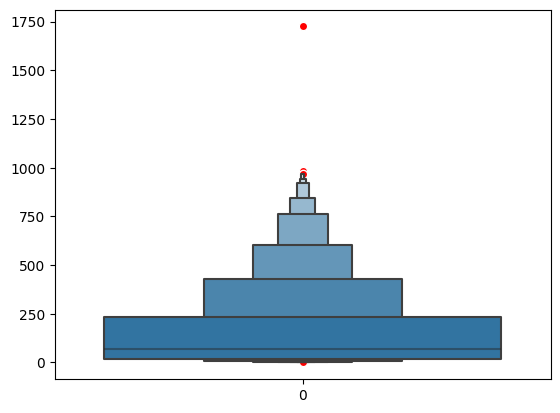

In [29]:
sns.boxenplot(
    df_marketing_campaign['MntMeatProducts'],
    flier_kws=red_circle_boxen
)
plt.show()

In [30]:
index_to_drop = df_marketing_campaign['MntMeatProducts'][df_marketing_campaign['MntMeatProducts'] > 1500].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

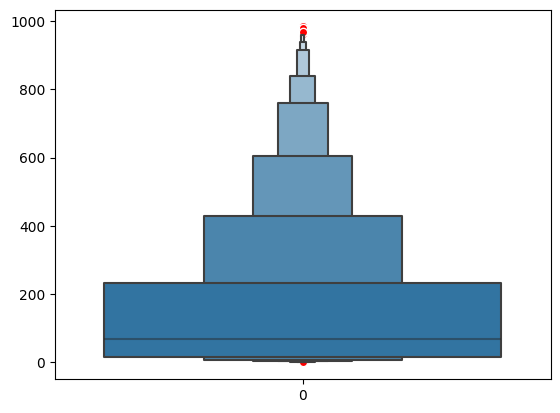

In [31]:
sns.boxenplot(
    df_marketing_campaign['MntMeatProducts'],
    flier_kws=red_circle_boxen
)
plt.show()

### MntSweetProducts Column

In [32]:
df_marketing_campaign['MntSweetProducts'].describe()

count    2204.000000
mean       27.140200
std        41.136034
min         0.000000
25%         1.000000
50%         8.000000
75%        34.000000
max       262.000000
Name: MntSweetProducts, dtype: float64

In [33]:
df_marketing_campaign['MntSweetProducts'].sort_values(ascending=False).head(15)

1898    262
634     198
1513    197
1671    196
1253    195
456     194
2012    194
1484    194
470     192
2096    192
2168    192
461     191
347     189
1259    189
1824    188
Name: MntSweetProducts, dtype: int64

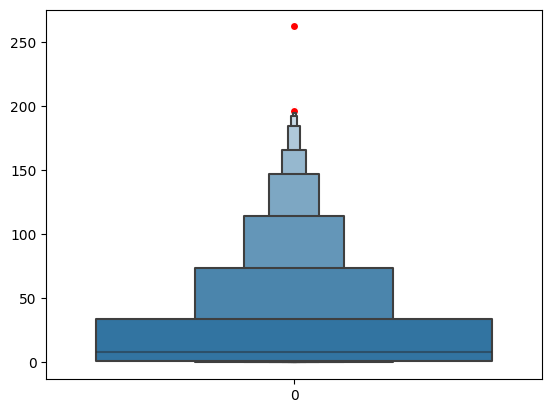

In [34]:
sns.boxenplot(
    df_marketing_campaign['MntSweetProducts'],
    flier_kws=red_circle_boxen
)
plt.show()

In [35]:
index_to_drop = df_marketing_campaign['MntSweetProducts'][df_marketing_campaign['MntSweetProducts'] > 200].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

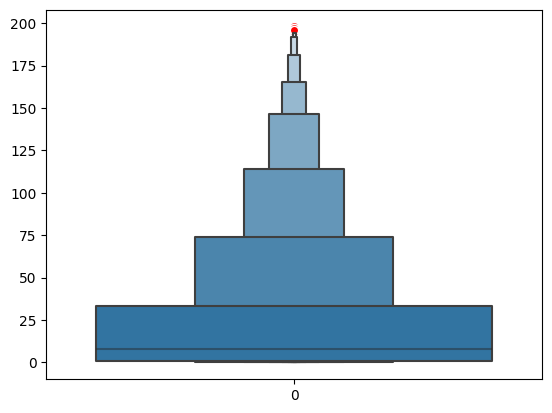

In [36]:
sns.boxenplot(
    df_marketing_campaign['MntSweetProducts'],
    flier_kws=red_circle_boxen
)
plt.show()

### NumWebPurchases Column

In [37]:
df_marketing_campaign['NumWebPurchases'].describe()

count    2203.000000
mean        4.092147
std         2.693408
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        25.000000
Name: NumWebPurchases, dtype: float64

In [38]:
df_marketing_campaign['NumWebPurchases'].sort_values(ascending=False).head(15)

1975    25
1806    23
1022    11
202     11
1309    11
2013    11
797     11
1488    11
67      11
1744    11
1252    11
336     11
2171    11
1226    11
1783    11
Name: NumWebPurchases, dtype: int64

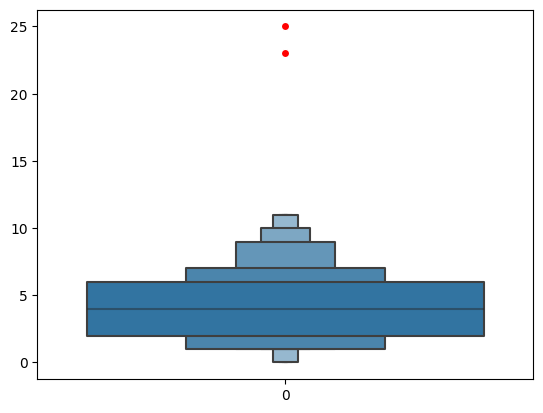

In [39]:
sns.boxenplot(
    df_marketing_campaign['NumWebPurchases'],
    flier_kws=red_circle_boxen
)
plt.show()

In [40]:
index_to_drop = df_marketing_campaign['NumWebPurchases'][df_marketing_campaign['NumWebPurchases'] > 20].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

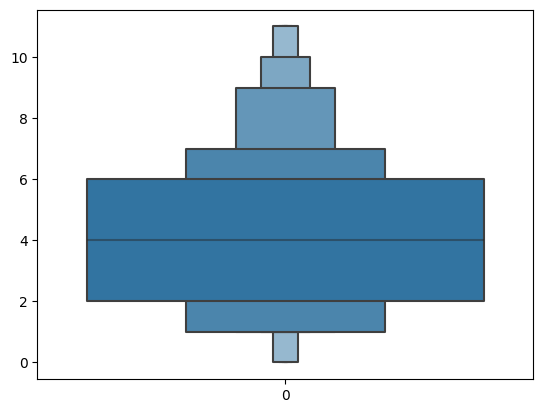

In [41]:
sns.boxenplot(
    df_marketing_campaign['NumWebPurchases'],
    flier_kws=red_circle_boxen
)
plt.show()

### NumCatalogPurchases Column

In [42]:
df_marketing_campaign['NumCatalogPurchases'].describe()

count    2201.000000
mean        2.636983
std         2.747143
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: NumCatalogPurchases, dtype: float64

In [43]:
df_marketing_campaign['NumCatalogPurchases'].sort_values(ascending=False).head(15)

764     11
984     11
1828    11
627     11
104     11
636     11
1745    11
1492    11
1465    11
777     11
1452    11
1212    11
591     11
1906    11
934     11
Name: NumCatalogPurchases, dtype: int64

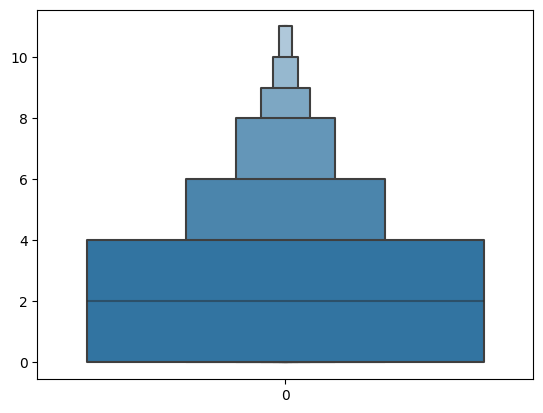

In [44]:
sns.boxenplot(
    df_marketing_campaign['NumCatalogPurchases'],
    flier_kws=red_circle_boxen
)
plt.show()

In [45]:
df_marketing_campaign['NumCatalogPurchases'].value_counts()

0     569
1     489
2     274
3     182
4     181
5     137
6     127
7      79
8      55
10     47
9      42
11     19
Name: NumCatalogPurchases, dtype: int64

We are not going to drop anything here in the NumCatalogPurchases Column

### NumWebVisitsMonth Column

In [46]:
df_marketing_campaign['NumWebVisitsMonth'].describe()

count    2201.000000
mean        5.345298
std         2.407712
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [47]:
df_marketing_campaign['NumWebVisitsMonth'].sort_values(ascending=False).head(15)

774     20
9       20
1245    20
1042    19
1846    19
1328    17
1524    14
981     14
2214    13
1868    10
605     10
47      10
1334     9
1442     9
651      9
Name: NumWebVisitsMonth, dtype: int64

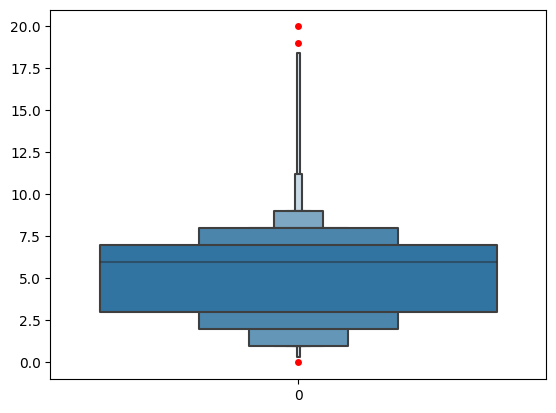

In [48]:
sns.boxenplot(
    df_marketing_campaign['NumWebVisitsMonth'],
    flier_kws=red_circle_boxen
)
plt.show()

We are not going to drop anything here in the NumWebVisitsMonth Column

### Z_CostContact and Z_Revenue Columns

These columns have constant values and do not add anything valuable

In [49]:
df_marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

### Education Column

We are going to group 2n Cycle with Master and then use Ordinal Encoder to assign each category to a different integer. The order will be:

0. Basic
1. Graduation
2. Master
3. PhD

In [50]:
df_marketing_campaign['Education'].value_counts()

Graduation    1111
PhD            474
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [51]:
df_marketing_campaign['Education'].replace(['2n Cycle'], ['Master'], inplace=True)

In [52]:
categories = [['Basic', 'Graduation', 'Master', 'PhD']]
oe_encoder = OrdinalEncoder(categories= categories)


In [53]:
df_marketing_campaign['Education_int'] = oe_encoder.fit_transform(df_marketing_campaign[['Education']])

In [54]:
df_marketing_campaign[['Education', 'Education_int']].value_counts()

Education   Education_int
Graduation  1.0              1111
Master      2.0               562
PhD         3.0               474
Basic       0.0                54
dtype: int64

In [55]:
oe_encoder.categories_

[array(['Basic', 'Graduation', 'Master', 'PhD'], dtype=object)]

### Marital_Status Column

In [56]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     852
Together    568
Single      468
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [57]:
index_to_drop = df_marketing_campaign['Marital_Status'][df_marketing_campaign['Marital_Status'].isin(['YOLO', 'Absurd'])].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)


In [58]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     852
Together    568
Single      468
Divorced    230
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [59]:
df_marketing_campaign['Marital_Status'].replace(['Alone'], ['Single'], inplace=True)
df_marketing_campaign['Marital_Status'].value_counts()

Married     852
Together    568
Single      471
Divorced    230
Widow        76
Name: Marital_Status, dtype: int64

In [60]:
df_marketing_campaign_before_encoders = df_marketing_campaign.copy()

In [61]:
# categories = [['Single', 'Together', 'Married', 'Divorced', 'Widow']]
# oe_encoder = OrdinalEncoder(categories= categories)
# df_marketing_campaign['Marital_Status_int'] = oe_encoder.fit_transform(df_marketing_campaign[['Marital_Status']])


In [62]:
mapping = {
    "Married": 0,
    "Together": 0,
    "Single": 1,
    "Divorced": 1,
    "Widow": 1    
}
df_marketing_campaign['WithPartner'] = df_marketing_campaign['Marital_Status'] .map(mapping)
df_marketing_campaign['WithPartner']

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: WithPartner, Length: 2197, dtype: int64

In [63]:
# ohe_encoder = OneHotEncoder(sparse_output=False)
# results_ohe = ohe_encoder.fit_transform(df_marketing_campaign[['Marital_Status']])
# df_ohe = pd.DataFrame(results_ohe, columns=ohe_encoder.get_feature_names_out(), index=df_marketing_campaign.index)
# # df_ohe
# df_marketing_campaign = pd.concat([df_marketing_campaign,df_ohe], axis=1)
# columns_to_check = ohe_encoder.get_feature_names_out().tolist()
# columns_to_check.append('Marital_Status')
# df_marketing_campaign[columns_to_check]

In [64]:
# ohe_encoder = OneHotEncoder(sparse_output=False)
# results_ohe = ohe_encoder.fit_transform(df_marketing_campaign[['Marital_Status']])
# df_ohe = pd.DataFrame(results_ohe, columns=ohe_encoder.get_feature_names_out(), index=df_marketing_campaign.index)
# # df_ohe
# df_marketing_campaign = pd.concat([df_marketing_campaign,df_ohe], axis=1)
# columns_to_check = ohe_encoder.get_feature_names_out().tolist()
# columns_to_check.append('Marital_Status')
# df_marketing_campaign[columns_to_check]

In [65]:
# df_marketing_campaign.drop(columns=['Marital_Status', 'Education'])

### Dt_customer Column

We create a new column that contains the difference in days between the first and the last enrollment, and then we drop the Dt_customer column

<AxesSubplot: >

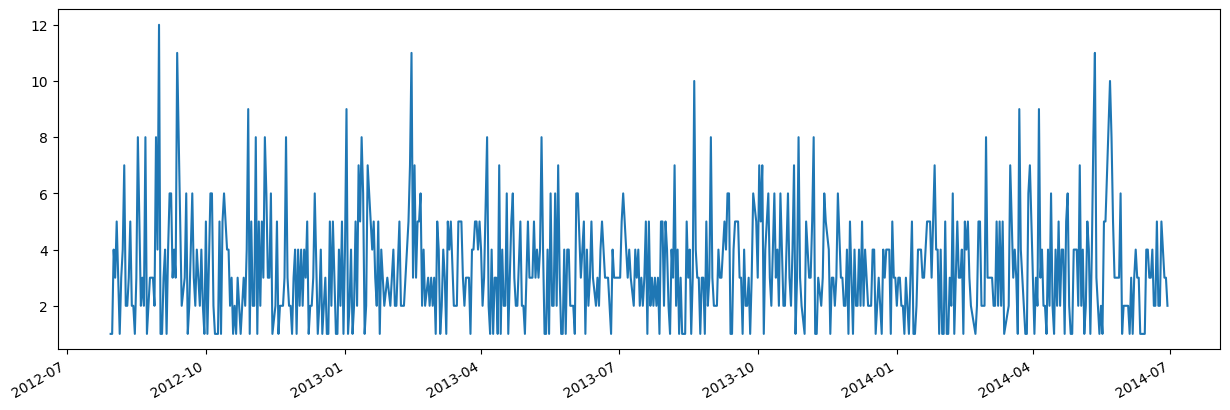

In [66]:
df_marketing_campaign['Dt_Customer'].value_counts().plot(figsize=(15,5))

In [67]:
df_marketing_campaign['Dt_Customer_diff_days'] = (df_marketing_campaign['Dt_Customer'] - df_marketing_campaign['Dt_Customer'].min()).dt.days

In [68]:
df_marketing_campaign[['Dt_Customer','Dt_Customer_diff_days']]

Dt_Customer  Dt_Customer_diff_days
0     2012-09-04                     36
1     2014-03-08                    586
2     2013-08-21                    387
3     2014-02-10                    560
4     2014-01-19                    538
...          ...                    ...
2235  2013-06-13                    318
2236  2014-06-10                    680
2237  2014-01-25                    544
2238  2014-01-24                    543
2239  2012-10-15                     77

[2197 rows x 2 columns]

In [69]:
df_marketing_campaign.drop(columns=['Dt_Customer'], inplace=True)

Let's see how the histograms look now after all the changes

In [ ]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

## Looking for Duplicates

In [71]:
df_marketing_campaign['ID'].value_counts().sort_values()

5524     1
5324     1
7446     1
965      1
6177     1
        ..
7004     1
10084    1
4201     1
10870    1
9405     1
Name: ID, Length: 2197, dtype: int64

In [72]:
df_marketing_campaign[df_marketing_campaign.duplicated()]

Empty DataFrame
Columns: [ID, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Decade_Born, Education_int, WithPartner, Dt_Customer_diff_days]
Index: []

## New columns (Feature Engineering)

Sum of all the Mnt columns representing the total amount spent an all products

In [73]:
columns_keep = df_marketing_campaign.columns.str.contains('Mnt')
df_marketing_campaign['MntTotalSpent'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

Sum of all the Purchases columns representing the total number of purchases made through all the different ways

In [74]:
# columns_keep = df_marketing_campaign.columns.str.contains('Num') & df_marketing_campaign.columns.str.contains('Purchases')
columns_keep = df_marketing_campaign.columns.str.contains('Purchases')
df_marketing_campaign['NumTotalPurchases'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

In [75]:
# columns_keep = df_marketing_campaign.columns.str.contains('Num')
# columns_keep = df_marketing_campaign.columns.str.contains('Num') & df_marketing_campaign.columns.str.contains('Purchases')
columns_keep = df_marketing_campaign.columns.str.contains('Purchases')

# df_marketing_campaign.loc[:,columns_keep]
min_value = (df_marketing_campaign['NumTotalPurchases'] - df_marketing_campaign['NumDealsPurchases']).min()
df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] - df_marketing_campaign['NumDealsPurchases'] == min_value), columns_keep]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
981                   0                0                    0   
1245                 15                0                    0   
1524                  0                0                    0   
1846                 15                0                    0   

      NumStorePurchases  NumTotalPurchases  
981                   0                  0  
1245                  0                 15  
1524                  0                  0  
1846                  0                 15

In [76]:
# df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0), columns_keep]
df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0)]


ID   Education Marital_Status  Income  Kidhome  Teenhome  Recency  \
981    3955  Graduation       Divorced  4861.0        0         0       20   
1524  11110  Graduation         Single  3502.0        1         0       56   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
981          2          1                1                1                 0   
1524         2          1                1                0                 0   

      MntGoldProds  NumDealsPurchases  ...  NumWebVisitsMonth  AcceptedCmp3  \
981              1                  0  ...                 14             0   
1524             1                  0  ...                 14             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
981              0             0             0             0         0   
1524             0             0             0             0         0   

      Response  Decade_Born  Education_int  WithPartner  \
981          0           60            1.0            1   
1524         0           70            1.0            1   

      Dt_Customer_diff_days  MntTotalSpent  NumTotalPurchases  
981                     692              6                  0  
1524                    257              5                  0  

[2 rows x 31 columns]

---

There are customers that have spent on products but never made a purchase. We drop those cases because they don't make sense. Though, in a real case scenario, this detection could be informed to discover the origin of these cases and fix where appropiate in the data collection.

---


In [77]:
index_to_drop = df_marketing_campaign.loc[(df_marketing_campaign['NumTotalPurchases'] == 0)].index
df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)

In [78]:
# df_marketing_campaign['RatioTotalMntPurchases'] = df_marketing_campaign['MntTotal'] / df_marketing_campaign['NumTotalPurchases']
# df_marketing_campaign['RatioMntWines'] = df_marketing_campaign['MntWines'] / df_marketing_campaign['MntTotal']
# df_marketing_campaign['RatioMntFruits'] = df_marketing_campaign['MntFruits'] / df_marketing_campaign['MntTotal']
# df_marketing_campaign['RatioMntMeatProducts'] = df_marketing_campaign['MntMeatProducts'] / df_marketing_campaign['MntTotal']
# df_marketing_campaign['RatioMntFishProducts'] = df_marketing_campaign['MntFishProducts'] / df_marketing_campaign['MntTotal']
# df_marketing_campaign['RatioMntSweetProducts'] = df_marketing_campaign['MntSweetProducts'] / df_marketing_campaign['MntTotal']
# df_marketing_campaign['RatioMntGoldProducts'] = df_marketing_campaign['MntGoldProds'] / df_marketing_campaign['MntTotal']

In [79]:
# df_marketing_campaign.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

Accepted any campaigns

In [80]:
# columns_keep = df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response') & ~df_marketing_campaign.columns.str.contains('Any')
columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response'))

df_marketing_campaign['AcceptedOfferAnyCmp'] = df_marketing_campaign.loc[:,columns_keep].any(axis=1).astype(int)

# columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response')) & ~df_marketing_campaign.columns.str.contains('Any')
# columns_keep = (df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response')) & ~df_marketing_campaign.columns.str.contains('Any') & ~df_marketing_campaign.columns.str.contains('Total')
# df_marketing_campaign['AcceptedOfferTotalCmp'] = df_marketing_campaign.loc[:,columns_keep].sum(axis=1)

# columns_keep = df_marketing_campaign.columns.str.contains('Accepted') | df_marketing_campaign.columns.str.contains('Response') 

# df_marketing_campaign.loc[:,columns_keep].sort_values(by=['AcceptedOfferTotalCmp'])

In [81]:
# df_marketing_campaign['AcceptedOfferAnyCmp'].hist(bins=35)

In [82]:
# df_marketing_campaign['RatioNumWebPurchases'] = df_marketing_campaign['NumWebPurchases'] / df_marketing_campaign['NumTotalPurchases']
# df_marketing_campaign['RatioNumCatalogPurchases'] = df_marketing_campaign['NumCatalogPurchases'] / df_marketing_campaign['NumTotalPurchases']
# df_marketing_campaign['RatioNumStorePurchases'] = df_marketing_campaign['NumStorePurchases'] / df_marketing_campaign['NumTotalPurchases']
# df_marketing_campaign['RatioNumDealsPurchases'] = df_marketing_campaign['NumDealsPurchases'] / df_marketing_campaign['NumTotalPurchases']

In [83]:
# df_marketing_campaign.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'], inplace=True)

In [84]:
# df_marketing_campaign['RatioIncomeMnt'] = (df_marketing_campaign['Income'] * 2) / df_marketing_campaign['MntTotal']

Create Parents column

In [85]:
columns_keep = df_marketing_campaign.columns.str.contains('home')
df_marketing_campaign['IsParent'] = df_marketing_campaign.loc[:,columns_keep].any(axis=1).astype(int)

# df_marketing_campaign.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

Product category most an least spent

In [86]:
columns_keep = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]
is_max = df_marketing_campaign[columns_keep].eq(df_marketing_campaign[columns_keep].max(axis=1), axis=0)
df_marketing_campaign['ProductMostSpent'] = is_max.dot(df_marketing_campaign[columns_keep].columns)
df_marketing_campaign.loc[is_max.sum(axis=1)> 1, ['ProductMostSpent']] = 'MoreThanOne'

is_min = df_marketing_campaign[columns_keep].eq(df_marketing_campaign[columns_keep].min(axis=1), axis=0)
df_marketing_campaign['ProductLeastSpent'] = is_min.dot(df_marketing_campaign[columns_keep].columns)
df_marketing_campaign.loc[is_min.sum(axis=1)> 1, ['ProductLeastSpent']] = 'MoreThanOne'

df_marketing_campaign[[
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds',
    'ProductLeastSpent'
]]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds ProductLeastSpent  
0               88       MoreThanOne  
1                6       MoreThanOne  
2               42  MntSweetProducts  
3                5  MntSweetProducts  
4               15      MntGoldProds  
...            ...               ...  
2235           247   MntFishProducts  
2236             8       MoreThanOne  
2237            24  MntSweetProducts  
2238            61       MoreThanOne  
2239            21  MntSweetProducts  

[2195 rows x 7 columns]

In [87]:
# Order for Ordinal Encoder
print(df_marketing_campaign[columns_keep].sum().sort_values().index)

Index(['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntGoldProds',
       'MntMeatProducts', 'MntWines'],
      dtype='object')


In [88]:
categories = [['MoreThanOne', *df_marketing_campaign[columns_keep].sum().sort_values().index]]
oe_encoder = OrdinalEncoder(categories= categories)
df_marketing_campaign['ProductMostSpent_int'] = oe_encoder.fit_transform(df_marketing_campaign[['ProductMostSpent']])
df_marketing_campaign['ProductLeastSpent_int'] = oe_encoder.fit_transform(df_marketing_campaign[['ProductLeastSpent']])


In [89]:
df_marketing_campaign[[
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds',
    'ProductMostSpent',
    'ProductMostSpent_int',
    'ProductLeastSpent',
    'ProductLeastSpent_int'
]].head(10)

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   
5       520         42               98                0                42   
6       235         65              164               50                49   
7        76         10               56                3                 1   
8        14          0               24                3                 3   
9        28          0                6                1                 1   

   MntGoldProds ProductMostSpent  ProductMostSpent_int ProductLeastSpent  \
0            88         MntWines                   6.0       MoreThanOne   
1             6         MntWines                   6.0       MoreThanOne   
2            42         MntWines                   6.0  MntSweetProducts   
3             5  MntMeatProducts                   5.0  MntSweetProducts   
4            15         MntWines                   6.0      MntGoldProds   
5            14         MntWines                   6.0   MntFishProducts   
6            27         MntWines                   6.0      MntGoldProds   
7            23         MntWines                   6.0  MntSweetProducts   
8             2  MntMeatProducts                   5.0         MntFruits   
9            13         MntWines                   6.0         MntFruits   

   ProductLeastSpent_int  
0                    0.0  
1                    0.0  
2                    2.0  
3                    2.0  
4                    4.0  
5                    3.0  
6                    4.0  
7                    2.0  
8                    1.0  
9                    1.0

In [90]:
df_saved_columns = pd.concat([df_saved_columns, df_marketing_campaign[columns_keep]], axis=1)

df_marketing_campaign.drop(
    columns = [
        'MntWines', 
        'MntFruits', 
        'MntMeatProducts', 
        'MntFishProducts', 
        'MntSweetProducts', 
        'MntGoldProds'
    ],
    inplace = True
)

### Correlation Matrix and Displots

In [91]:
df_marketing_campaign_num = df_marketing_campaign.drop(columns=['ID']).select_dtypes(exclude='object')

In [ ]:
# CREATE THE MATRIX
matrix = df_marketing_campaign_num.corr()

# CREATE CMAP
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                          n=9, center="light", as_cmap=True)
# CREATE A MASK
mask = np.triu(np.ones_like(matrix, dtype=bool))

# MAKE FIGSIZE BIGGER
fig, ax = plt.subplots(figsize=(16,12))

# PLOT THE MATRIX
_ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
          fmt='.2f', square=True, cmap=cmap, ax=ax, annot_kws={"fontsize":5})

#### More than 0.5

In [93]:
matrix_2 = matrix.copy()
_ = np.round(matrix_2[(matrix_2 > 0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix_2[:] = _
dict_corr_greater_05 = dict(matrix_2.stack().items())

In [ ]:
n_cols =  3
n_rows = int(np.ceil((len(dict_corr_greater_05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_greater_05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y]], 
              x=x, 
              y=y,
              ax=axes[i//n_cols,i%n_cols]
       )
       axes[i//n_cols,i%n_cols].legend([value])

#### Less than - 0.5

In [95]:
matrix_2 = matrix.copy()
_ = np.round(matrix_2[(matrix_2 < -0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix_2[:] = _
dict_corr_less_minus05 = dict(matrix_2.stack().items())

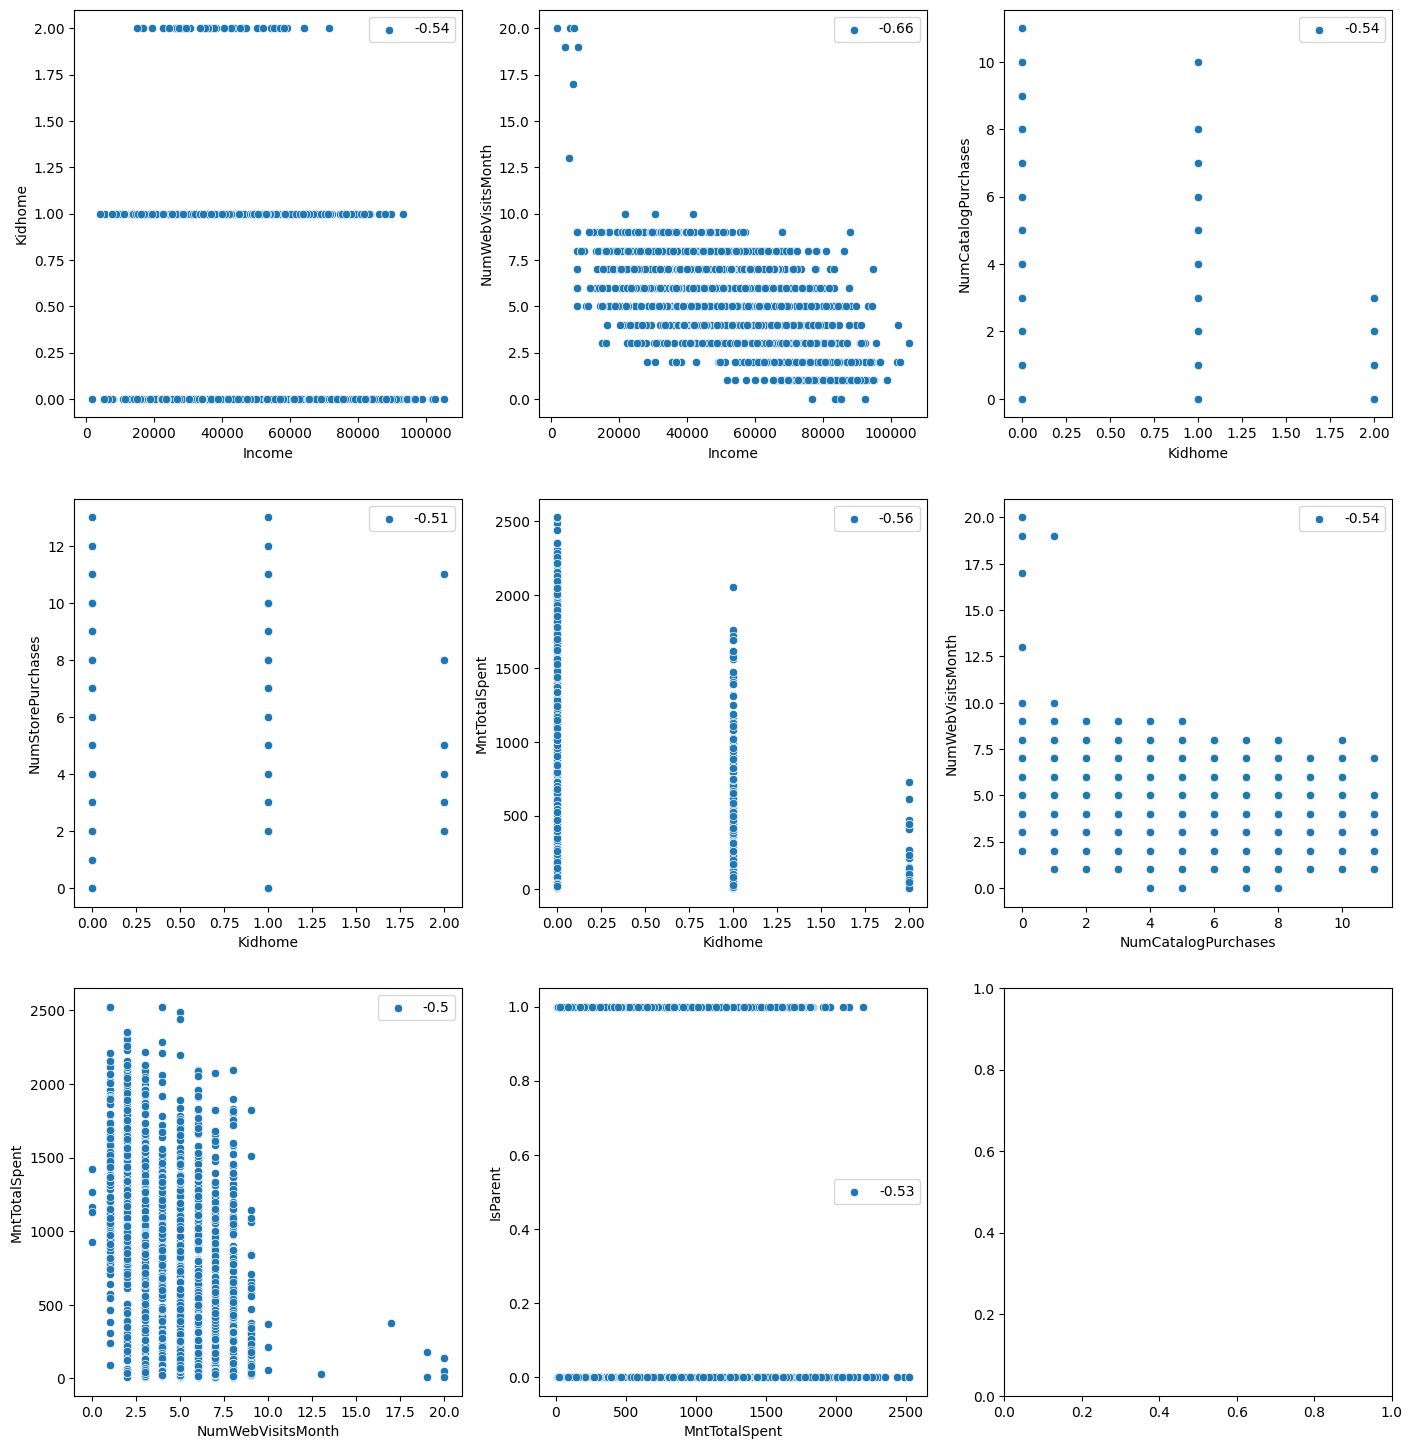

In [96]:
n_cols =  3
n_rows = int(np.ceil((len(dict_corr_less_minus05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_less_minus05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y]], 
              x=x, 
              y=y,
              ax=axes[i//n_cols,i%n_cols]
       )
       axes[i//n_cols,i%n_cols].legend([value])
       

In [97]:
standard_scaler = StandardScaler()

array_marketing_campaign_num_scaled = standard_scaler.fit_transform(df_marketing_campaign_num)

In [98]:
df_marketing_campaign_num_scaled =  pd.DataFrame(array_marketing_campaign_num_scaled, columns=df_marketing_campaign_num.columns)
df_marketing_campaign_num_scaled.head()

Income   Kidhome  Teenhome   Recency  NumDealsPurchases  NumWebPurchases  \
0  0.313555 -0.825007 -0.931925  0.308555           0.366871         1.494875   
1 -0.259540  1.036134  0.907621 -0.383393          -0.169269        -1.171569   
2  0.968333 -0.825007 -0.931925 -0.798562          -0.705409         1.494875   
3 -1.216706  1.036134 -0.931925 -0.798562          -0.169269        -0.790649   
4  0.321087  1.036134 -0.931925  1.554063           1.439152         0.352113   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.683791          -0.568288           0.694596     -0.283225   
1            -0.596435          -1.186574          -0.141509     -0.283225   
2            -0.231965           1.286571          -0.559562     -0.283225   
3            -0.960904          -0.568288           0.276543     -0.283225   
4             0.132504           0.049998          -0.141509     -0.283225   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0     -0.284163       -0.2804     -0.262005     -0.117715 -0.095893  2.373061   
1     -0.284163       -0.2804     -0.262005     -0.117715 -0.095893 -0.421397   
2     -0.284163       -0.2804     -0.262005     -0.117715 -0.095893 -0.421397   
3     -0.284163       -0.2804     -0.262005     -0.117715 -0.095893 -0.421397   
4     -0.284163       -0.2804     -0.262005     -0.117715 -0.095893 -0.421397   

   Decade_Born  Education_int  WithPartner  Dt_Customer_diff_days  \
0    -1.200280      -0.788228     1.353609              -1.527862   
1    -1.200280      -0.788228     1.353609               1.189482   
2    -0.364425      -0.788228    -0.738766               0.206298   
3     1.307285      -0.788228    -0.738766               1.061026   
4     1.307285       1.596556    -0.738766               0.952332   

   MntTotalSpent  NumTotalPurchases  AcceptedOfferAnyCmp  IsParent  \
0       1.678580           1.336805             1.626708 -1.586704   
1      -0.963521          -1.169554            -0.614738  0.630237   
2       0.281091           0.809151            -0.614738 -1.586704   
3      -0.920317          -0.905727            -0.614738  0.630237   
4      -0.307150           0.545323            -0.614738  0.630237   

   ProductMostSpent_int  ProductLeastSpent_int  
0              0.509802              -1.151947  
1              0.509802              -1.151947  
2              0.509802               0.179556  
3             -0.341160               0.179556  
4              0.509802               1.511059

In [99]:
df_marketing_campaign_num_scaled.describe().T

count          mean       std       min       25%  \
Income                 2195.0  2.589677e-17  1.000228 -2.427426 -0.796968   
Kidhome                2195.0  7.445323e-17  1.000228 -0.825007 -0.825007   
Teenhome               2195.0  5.826774e-17  1.000228 -0.931925 -0.931925   
Recency                2195.0 -5.583992e-17  1.000228 -1.698095 -0.867757   
NumDealsPurchases      2195.0 -2.913387e-17  1.000228 -1.241549 -0.705409   
NumWebPurchases        2195.0 -9.711290e-17  1.000228 -1.552490 -0.790649   
NumCatalogPurchases    2195.0  6.474193e-18  1.000228 -0.960904 -0.960904   
NumStorePurchases      2195.0 -2.144577e-17  1.000228 -1.804861 -0.877431   
NumWebVisitsMonth      2195.0  8.740161e-17  1.000228 -2.231773 -0.977615   
AcceptedCmp3           2195.0  1.861331e-17  1.000228 -0.283225 -0.283225   
AcceptedCmp4           2195.0 -4.855645e-18  1.000228 -0.284163 -0.284163   
AcceptedCmp5           2195.0 -8.173669e-17  1.000228 -0.280400 -0.280400   
AcceptedCmp1           2195.0 -9.711290e-18  1.000228 -0.262005 -0.262005   
AcceptedCmp2           2195.0  7.283468e-18  1.000228 -0.117715 -0.117715   
Complain               2195.0  2.913387e-17  1.000228 -0.095893 -0.095893   
Response               2195.0 -5.988629e-17  1.000228 -0.421397 -0.421397   
Decade_Born            2195.0  2.751532e-16  1.000228 -2.036135 -1.200280   
Education_int          2195.0 -8.416452e-17  1.000228 -1.980620 -0.788228   
WithPartner            2195.0  5.664919e-17  1.000228 -0.738766 -0.738766   
Dt_Customer_diff_days  2195.0 -6.312339e-17  1.000228 -1.705724 -0.865818   
MntTotalSpent          2195.0  4.046371e-17  1.000228 -0.995094 -0.893730   
NumTotalPurchases      2195.0  1.084427e-16  1.000228 -1.829123 -0.905727   
AcceptedOfferAnyCmp    2195.0 -1.650919e-16  1.000228 -0.614738 -0.614738   
IsParent               2195.0  1.942258e-17  1.000228 -1.586704 -1.586704   
ProductMostSpent_int   2195.0  3.528435e-16  1.000228 -4.595969 -0.341160   
ProductLeastSpent_int  2195.0  3.156169e-17  1.000228 -1.151947 -1.151947   

                            50%       75%        max  
Income                -0.015365  0.807275   2.613564  
Kidhome               -0.825007  1.036134   2.897276  
Teenhome              -0.931925  0.907621   2.747167  
Recency               -0.002821  0.862114   1.727050  
NumDealsPurchases     -0.169269  0.366871   6.800554  
NumWebPurchases       -0.028808  0.733034   2.637637  
NumCatalogPurchases   -0.231965  0.496974   3.048260  
NumStorePurchases     -0.259145  0.668284   2.214000  
NumWebVisitsMonth      0.276543  0.694596   6.129283  
AcceptedCmp3          -0.283225 -0.283225   3.530759  
AcceptedCmp4          -0.284163 -0.284163   3.519112  
AcceptedCmp5          -0.280400 -0.280400   3.566336  
AcceptedCmp1          -0.262005 -0.262005   3.816723  
AcceptedCmp2          -0.117715 -0.117715   8.495097  
Complain              -0.095893 -0.095893  10.428327  
Response              -0.421397 -0.421397   2.373061  
Decade_Born            0.471430  0.471430   2.143140  
Education_int         -0.788228  0.404164   1.596556  
WithPartner           -0.738766  1.353609   1.353609  
Dt_Customer_diff_days -0.011090  0.858460   1.747773  
MntTotalSpent         -0.348693  0.729750   3.187403  
NumTotalPurchases      0.017669  0.809151   3.183597  
AcceptedOfferAnyCmp   -0.614738  1.626708   1.626708  
IsParent               0.630237  0.630237   0.630237  
ProductMostSpent_int   0.509802  0.509802   0.509802  
ProductLeastSpent_int  0.179556  0.845307   2.842562

## Different datasets

In [100]:
# list_df_num_scaled = []
# for _ in range(0,500):
#     random_number_columns = np.random.randint(20, len(df_marketing_campaign_num_scaled.columns))
#     df_marketing_campaign_num_scaled.sample(random_number_columns, axis=1)
#     list_df_num_scaled.append(df_marketing_campaign_num_scaled.sample(random_number_columns, axis=1))

# PCA

In [101]:
pca = PCA()
pca.fit(df_marketing_campaign_num_scaled)

PCA()

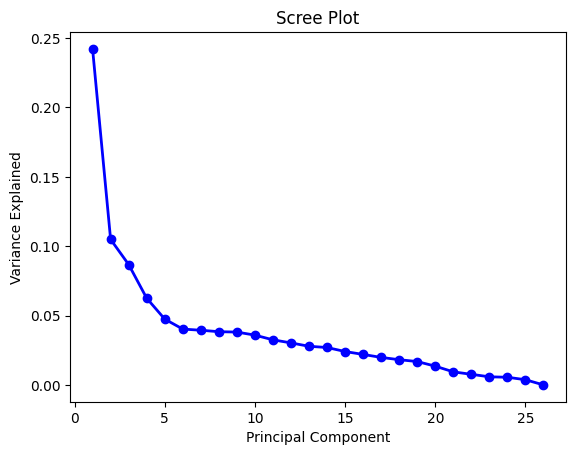

In [102]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

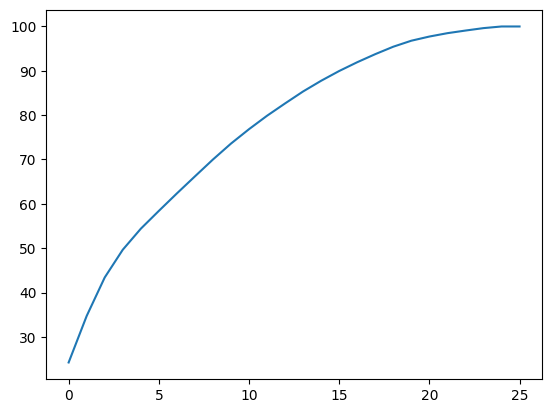

In [103]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100))


In [104]:
array_marketing_campaign_num_scaled_pca = pca.transform(df_marketing_campaign_num_scaled)
df_marketing_campaign_num_scaled_pca2 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:2]
df_marketing_campaign_num_scaled_pca3 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:3]
df_marketing_campaign_num_scaled_pca4 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:4]
df_marketing_campaign_num_scaled_pca5 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:5]

[]

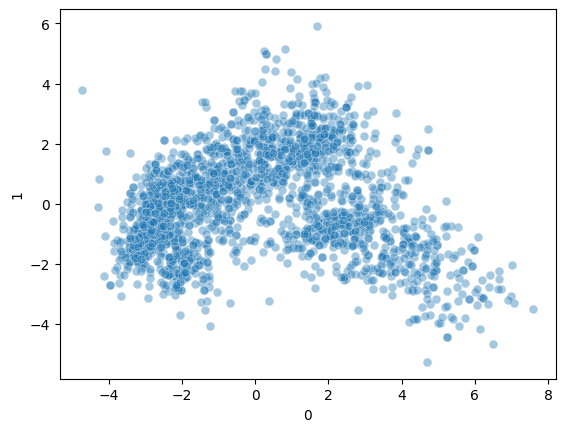

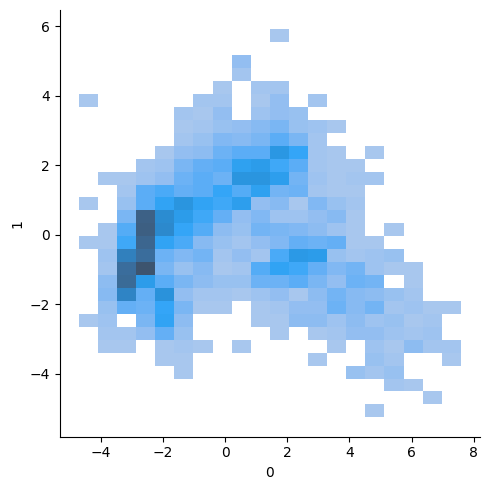

In [105]:
sns.scatterplot(
    df_marketing_campaign_num_scaled_pca2, 
    x=0, 
    y=1,
    alpha=0.4,
    s=40
)

sns.displot(
    df_marketing_campaign_num_scaled_pca2, 
    x=0, 
    y=1
)
plt.plot()

In [ ]:
fig_3d = px.scatter_3d(
    df_marketing_campaign_num_scaled_pca3, x=0, y=1, z=2
)

fig_3d.show()

# Clustering

## K-Means

### With PCA (2, 3, 4, 5 components)

In [107]:
sum_of_squared_distances_pca3 = []
silhouette_scores_pca3 = []
sum_of_squared_distances_pca2 = []
silhouette_scores_pca2 = []
sum_of_squared_distances_pca4 = []
silhouette_scores_pca4 = []
sum_of_squared_distances_pca5 = []
silhouette_scores_pca5 = []
k = range(2,10)
for _ in k:
  kmeans_model_pca2 = KMeans(n_clusters=_, n_init='auto')
  kmeans_model_pca3 = KMeans(n_clusters=_, n_init='auto')
  kmeans_model_pca4 = KMeans(n_clusters=_, n_init='auto')
  kmeans_model_pca5 = KMeans(n_clusters=_, n_init='auto')
  y_pca2 = kmeans_model_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
  y_pca3 = kmeans_model_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
  y_pca4 = kmeans_model_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
  y_pca5 = kmeans_model_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
  sum_of_squared_distances_pca2.append(kmeans_model_pca2.inertia_)
  sum_of_squared_distances_pca3.append(kmeans_model_pca3.inertia_)
  sum_of_squared_distances_pca4.append(kmeans_model_pca4.inertia_)
  sum_of_squared_distances_pca5.append(kmeans_model_pca5.inertia_)
  silhouette_scores_pca2.append(silhouette_score(df_marketing_campaign_num_scaled_pca2, y_pca2))
  silhouette_scores_pca3.append(silhouette_score(df_marketing_campaign_num_scaled_pca3, y_pca3))
  silhouette_scores_pca4.append(silhouette_score(df_marketing_campaign_num_scaled_pca4, y_pca4))
  silhouette_scores_pca5.append(silhouette_score(df_marketing_campaign_num_scaled_pca5, y_pca5))

## TEST RANDOM COLUMNS

In [108]:
# scores_pca2_cluster3 = []
# scores_pca2_cluster4 = []
# scores_pca3_cluster3 = []
# scores_pca3_cluster4 = []
# for _, df_num_scaled in enumerate(list_df_num_scaled):
#     # if _ > 3:
#     #     break
#     pca = PCA()
#     pca.fit(df_num_scaled)

#     array_marketing_campaign_num_scaled_pca = pca.transform(df_num_scaled)
#     df_num_scaled_pca2 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:2]
#     df_num_scaled_pca3 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:3]
    
#     scores_pca2_cluster3.append(silhouette_score(df_num_scaled_pca2, KMeans(n_clusters=3, n_init='auto').fit_predict(df_num_scaled_pca2)))
#     scores_pca2_cluster4.append(silhouette_score(df_num_scaled_pca2, KMeans(n_clusters=4, n_init='auto').fit_predict(df_num_scaled_pca2)))
#     scores_pca3_cluster3.append(silhouette_score(df_num_scaled_pca3, KMeans(n_clusters=3, n_init='auto').fit_predict(df_num_scaled_pca3)))
#     scores_pca3_cluster4.append(silhouette_score(df_num_scaled_pca3, KMeans(n_clusters=4, n_init='auto').fit_predict(df_num_scaled_pca3)))

In [109]:
# max_val = max(scores_pca2_cluster3)
# df_index = scores_pca2_cluster3.index(max_val)
# print(f'max_val: {max_val}, df_index: {df_index}')

In [110]:
# max_val = max(scores_pca2_cluster4)
# df_index = scores_pca2_cluster4.index(max_val)
# print(f'max_val: {max_val}, df_index: {df_index}')

In [111]:
# max_val = max(scores_pca3_cluster3)
# df_index = scores_pca3_cluster3.index(max_val)
# print(f'max_val: {max_val}, df_index: {df_index}')

In [112]:
# max_val = max(scores_pca3_cluster4)
# df_index = scores_pca3_cluster4.index(max_val)
# print(f'max_val: {max_val}, df_index: {df_index}')

In [113]:
# list_df_num_scaled[94].columns

In [114]:
# list_df_num_scaled[94]['kmeans_pca2'] =  KMeans(n_clusters=3, n_init='auto').fit_predict(list_df_num_scaled[94])

# df_marketing_campaign['kmeans_pca2'] = list_df_num_scaled[94]['kmeans_pca2'] 

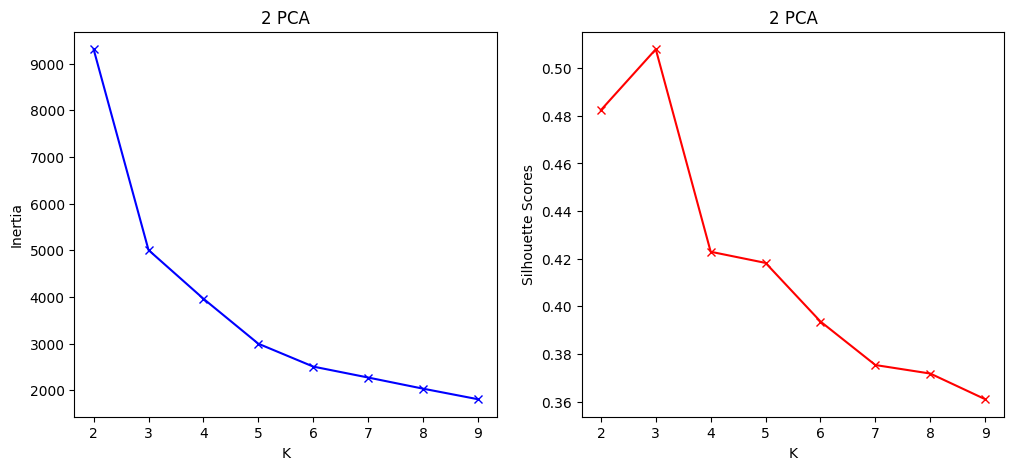

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
# plt.figure(figsize=(8,8))
axes[0].plot(k, sum_of_squared_distances_pca2, 'bx-')
axes[0].set_title('2 PCA')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')

axes[1].plot(k, silhouette_scores_pca2, 'rx-')
axes[1].set_title('2 PCA')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Scores')

plt.show()

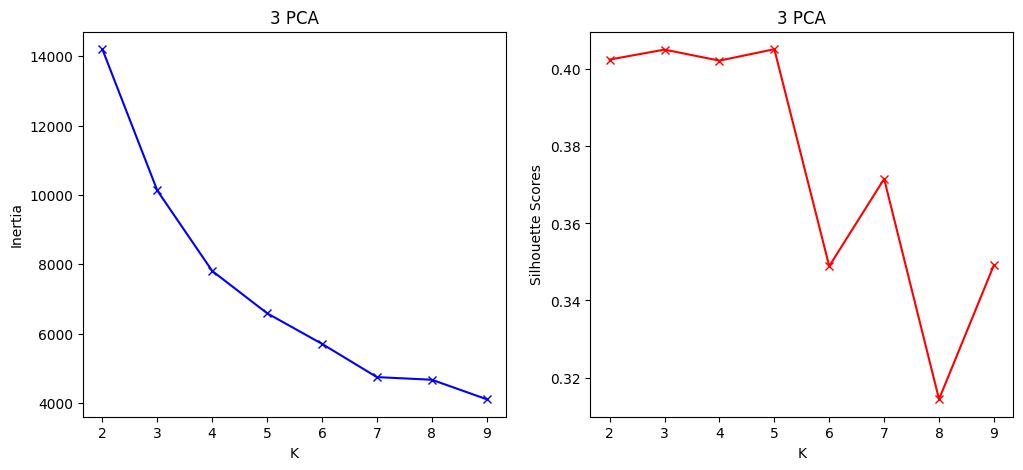

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
# plt.figure(figsize=(8,8))
axes[0].plot(k, sum_of_squared_distances_pca3, 'bx-')
axes[0].set_title('3 PCA')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')

axes[1].plot(k, silhouette_scores_pca3, 'rx-')
axes[1].set_title('3 PCA')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Scores')

plt.show()

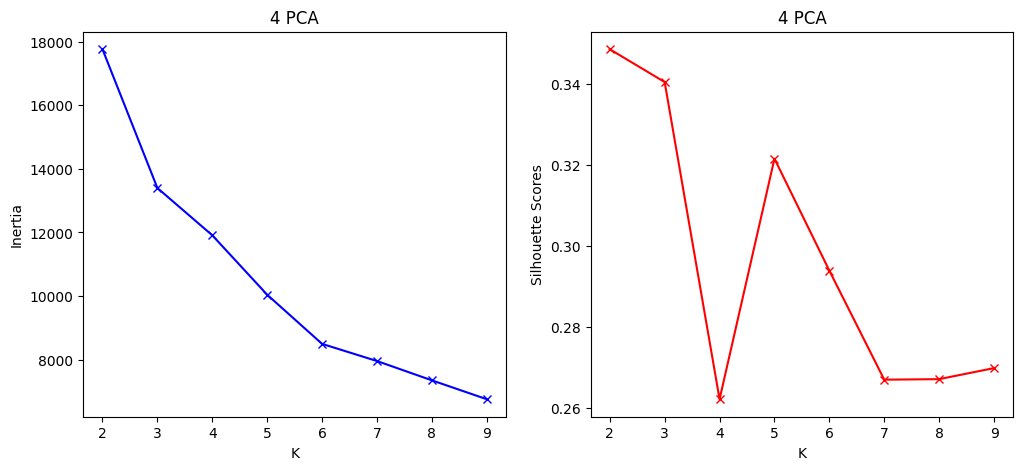

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
# plt.figure(figsize=(8,8))
axes[0].plot(k, sum_of_squared_distances_pca4, 'bx-')
axes[0].set_title('4 PCA')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')

axes[1].plot(k, silhouette_scores_pca4, 'rx-')
axes[1].set_title('4 PCA')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Scores')

plt.show()

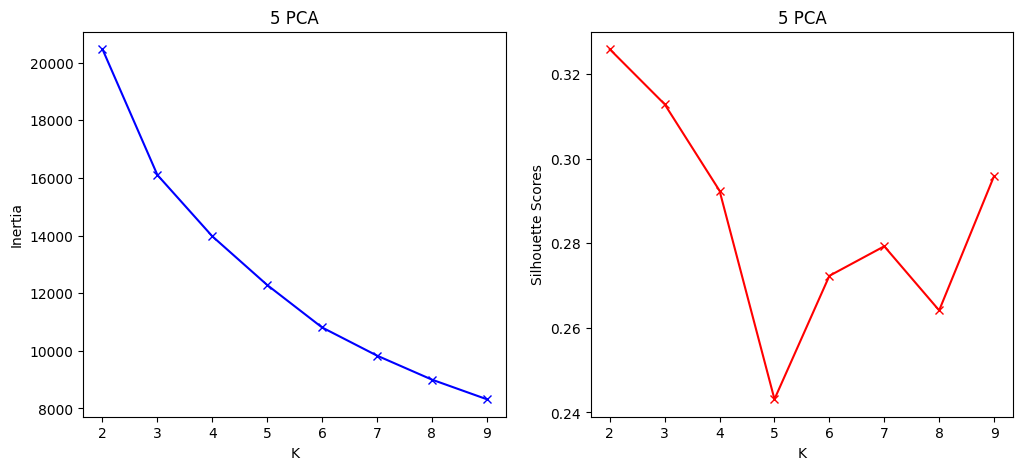

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
# plt.figure(figsize=(8,8))
axes[0].plot(k, sum_of_squared_distances_pca5, 'bx-')
axes[0].set_title('5 PCA')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')

axes[1].plot(k, silhouette_scores_pca5, 'rx-')
axes[1].set_title('5 PCA')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Scores')

plt.show()

In [119]:
kmeans_model_pca2 = KMeans(n_clusters=3, n_init='auto')
y_pca2 = kmeans_model_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
print(silhouette_score(df_marketing_campaign_num_scaled_pca2,y_pca2))

0.5074112405496232


In [120]:
kmeans_model_pca3 = KMeans(n_clusters=4, n_init='auto')
y_pca3 = kmeans_model_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
print(silhouette_score(df_marketing_campaign_num_scaled_pca3,y_pca3))

0.4016900966845172


In [121]:
kmeans_model_pca4 = KMeans(n_clusters=4, n_init='auto')
y_pca4 = kmeans_model_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
print(silhouette_score(df_marketing_campaign_num_scaled_pca4,y_pca4))

0.2620778665712689


In [122]:
kmeans_model_pca5 = KMeans(n_clusters=4, n_init='auto')
y_pca5 = kmeans_model_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
print(silhouette_score(df_marketing_campaign_num_scaled_pca5,y_pca5))

0.23723907541008116


In [123]:
df_marketing_campaign['kmeans_pca2'] = y_pca2

kmeans_pca2


0    986
1    696
2    513
Name: kmeans_pca2, dtype: int64


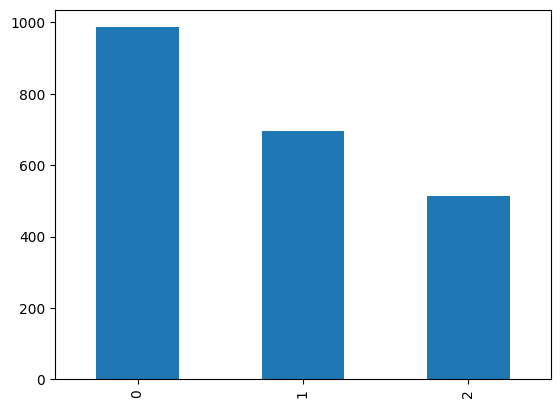

In [124]:
print('kmeans_pca2')
print('\n')
print(df_marketing_campaign['kmeans_pca2'].value_counts())
df_marketing_campaign['kmeans_pca2'].value_counts().plot(kind='bar')
plt.show()
print('\n')

In [125]:
fig_2d = px.scatter(
    df_marketing_campaign_num_scaled_pca2, x=0, y=1,
    color=kmeans_model_pca2.labels_, labels={'color': 'class'}
)

fig_2d.show()

<AxesSubplot: xlabel='0', ylabel='1'>

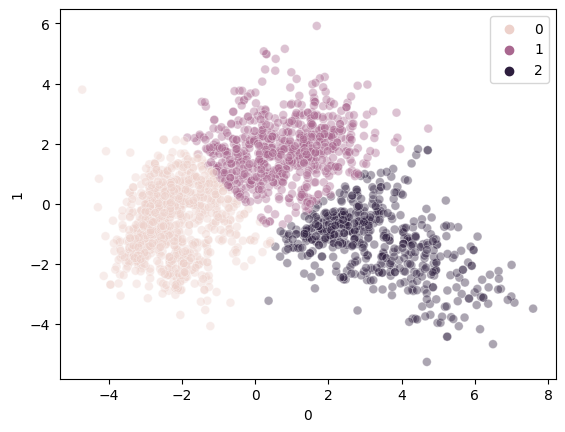

In [126]:
sns.scatterplot(
    df_marketing_campaign_num_scaled_pca2, 
    x=0, 
    y=1,
    hue=kmeans_model_pca2.labels_,
    alpha=0.4,
    s=40
)

### Without PCA

In [127]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k:
  kmeans_model = KMeans(n_clusters=_, n_init='auto')
  y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
  sum_of_squared_distances.append(kmeans_model.inertia_)
  silhouette_scores.append(silhouette_score(df_marketing_campaign_num_scaled, y))
  

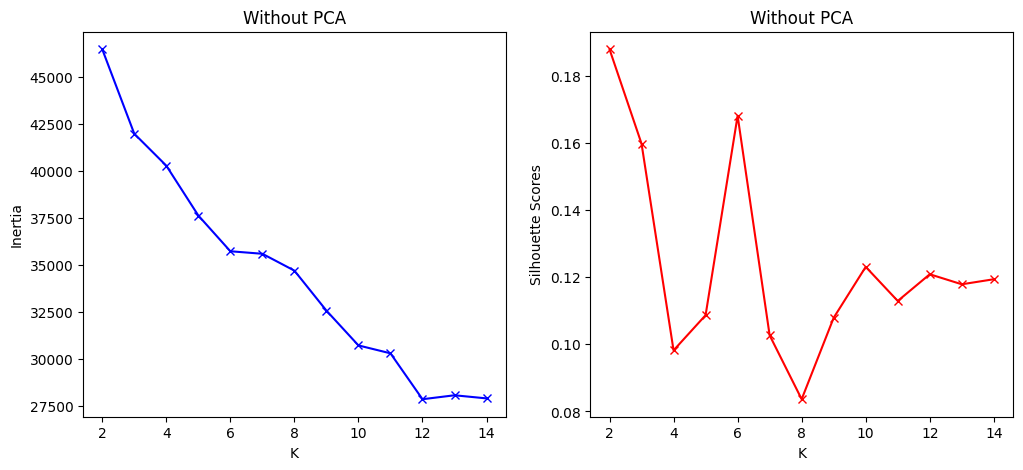

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
# plt.figure(figsize=(8,8))
axes[0].plot(k, sum_of_squared_distances, 'bx-')
axes[0].set_title('Without PCA')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')

axes[1].plot(k, silhouette_scores, 'rx-')
axes[1].set_title('Without PCA')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Scores')

plt.show()

In [129]:
kmeans_model = KMeans(n_clusters=5, n_init='auto')
y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
print(silhouette_score(df_marketing_campaign_num_scaled,y))

0.11027237942583869


In [130]:
df_marketing_campaign['kmeans'] = y

kmeans


0    615
4    577
1    463
3    366
2    174
Name: kmeans, dtype: int64


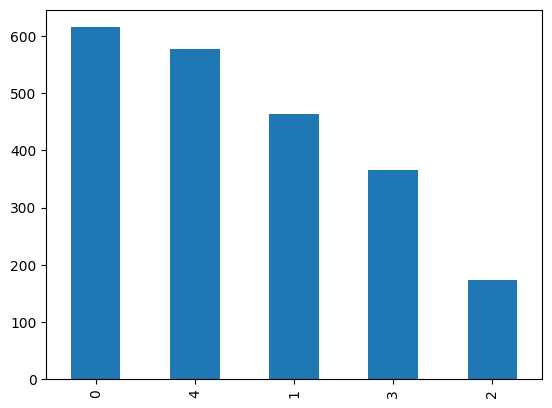

In [131]:
print('kmeans')
print('\n')
print(df_marketing_campaign['kmeans'].value_counts())
df_marketing_campaign['kmeans'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## Agglomerative Clustering

### 2 PCA

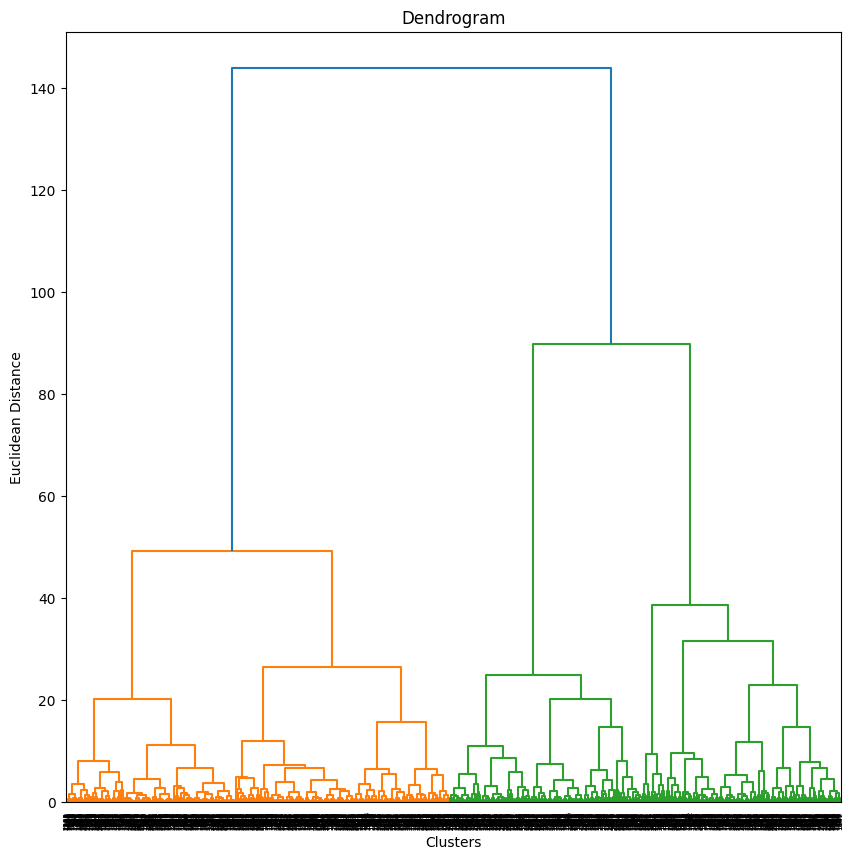

In [132]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [127]:
agglomerative_model_c2_pca2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4_pca2 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c5_pca2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_model_c6_pca2 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_model_c7_pca2 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agglomerative_model_c8_pca2 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agglomerative_model_c9_pca2 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2_pca2 = agglomerative_model_c2_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c3_pca2 = agglomerative_model_c3_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c4_pca2 = agglomerative_model_c4_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c5_pca2 = agglomerative_model_c5_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c6_pca2 = agglomerative_model_c6_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c7_pca2 = agglomerative_model_c7_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c8_pca2 = agglomerative_model_c8_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)
y_c9_pca2 = agglomerative_model_c9_pca2.fit_predict(df_marketing_campaign_num_scaled_pca2)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c2_pca2)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c3_pca2)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c4_pca2)}')
print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c5_pca2)}')
print(f'6 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c6_pca2)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c7_pca2)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c8_pca2)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca2,y_c9_pca2)}')

df_marketing_campaign['ac_pca2'] = y_c3_pca2

2 clusters: 0.47648172129052413
3 clusters: 0.4906330840634806
4 clusters: 0.4125820437530831
5 clusters: 0.3908474047908125
6 clusters: 0.3696243826285552
7 clusters: 0.34119098213438964
8 clusters: 0.3167146606706468
9 clusters: 0.3263818577042785


In [128]:
# df_marketing_campaign_num_scaled_pca2['kmeans_pca2'] = df_marketing_campaign['kmeans_pca2']
fig_2d = px.scatter(
    df_marketing_campaign_num_scaled_pca2, x=0, y=1,
    color=agglomerative_model_c3_pca2.labels_, labels={'color': 'class'}
)

fig_2d.show()

<AxesSubplot: xlabel='0', ylabel='1'>

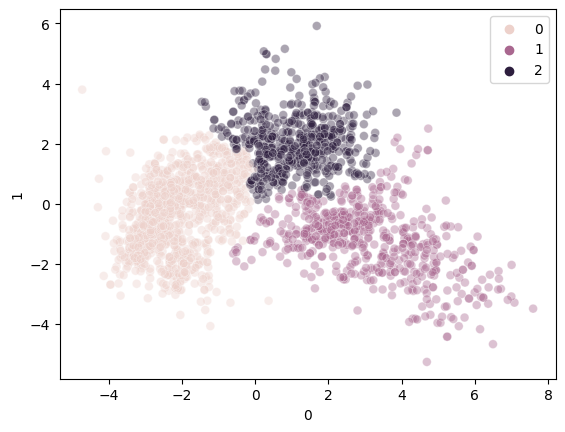

In [129]:
sns.scatterplot(
    df_marketing_campaign_num_scaled_pca2, 
    x=0, 
    y=1,
    hue=agglomerative_model_c3_pca2.labels_,
    alpha=0.4,
    s=40
)

ac_pca2


0    1088
1     562
2     545
Name: ac_pca2, dtype: int64


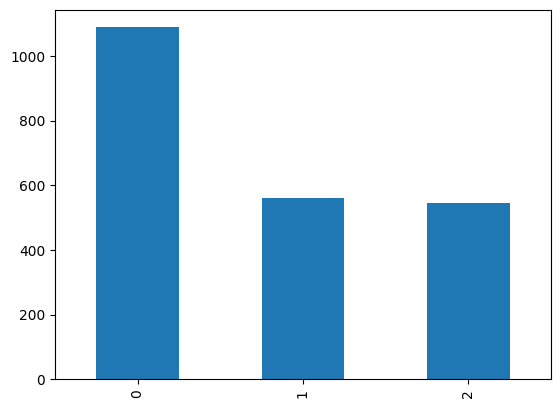

In [136]:
print('ac_pca2')
print('\n')
print(df_marketing_campaign['ac_pca2'].value_counts())
df_marketing_campaign['ac_pca2'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### 3 PCA

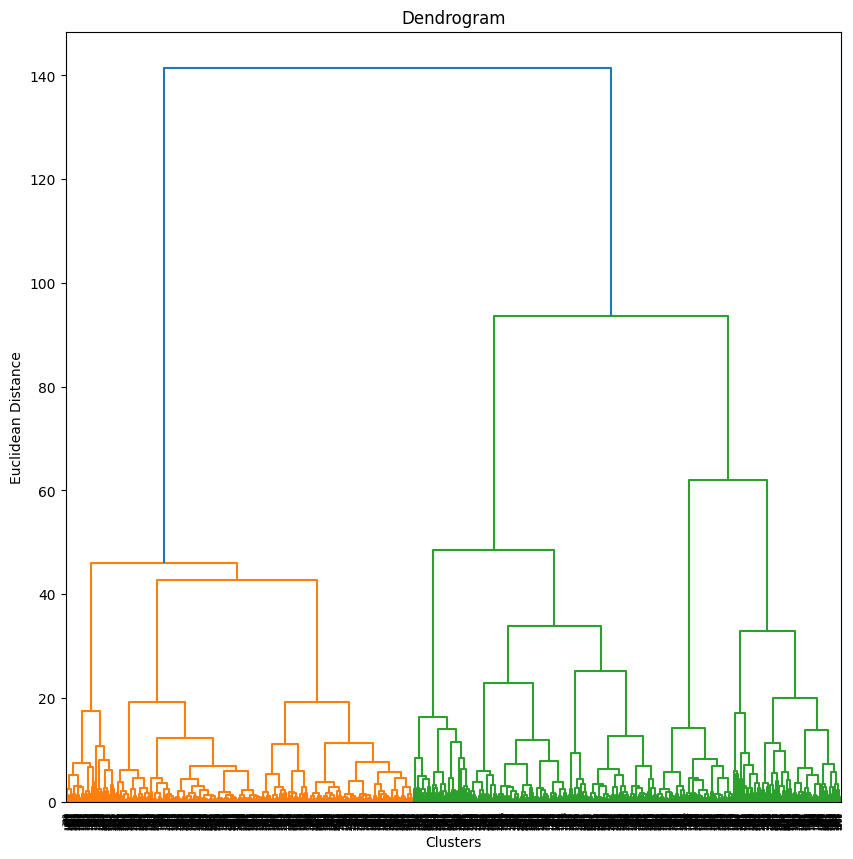

In [137]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca3, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [138]:
agglomerative_model_c2_pca3 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4_pca3 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c5_pca3 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_model_c6_pca3 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_model_c7_pca3 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agglomerative_model_c8_pca3 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agglomerative_model_c9_pca3 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2_pca3 = agglomerative_model_c2_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c3_pca3 = agglomerative_model_c3_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c4_pca3 = agglomerative_model_c4_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c5_pca3 = agglomerative_model_c5_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c6_pca3 = agglomerative_model_c6_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c7_pca3 = agglomerative_model_c7_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c8_pca3 = agglomerative_model_c8_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)
y_c9_pca3 = agglomerative_model_c9_pca3.fit_predict(df_marketing_campaign_num_scaled_pca3)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c2_pca3)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c3_pca3)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c4_pca3)}')
print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c5_pca3)}')
print(f'6 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c6_pca3)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c7_pca3)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c8_pca3)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca3,y_c9_pca3)}')

df_marketing_campaign['ac_pca3'] = y_c4_pca3

2 clusters: 0.37498836958036025
3 clusters: 0.3782296756650026
4 clusters: 0.3760712486928503
5 clusters: 0.3736721822275471
6 clusters: 0.37088149343811055
7 clusters: 0.33777986357918505
8 clusters: 0.3239543241211734
9 clusters: 0.32692834066997833


ac_pca3


1    986
0    690
2    303
3    216
Name: ac_pca3, dtype: int64


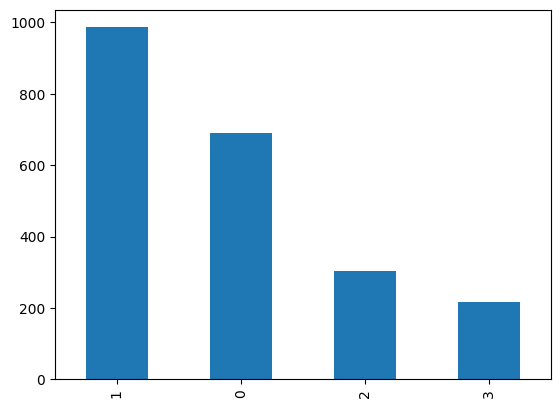

In [139]:
print('ac_pca3')
print('\n')
print(df_marketing_campaign['ac_pca3'].value_counts())
df_marketing_campaign['ac_pca3'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### 4 PCA

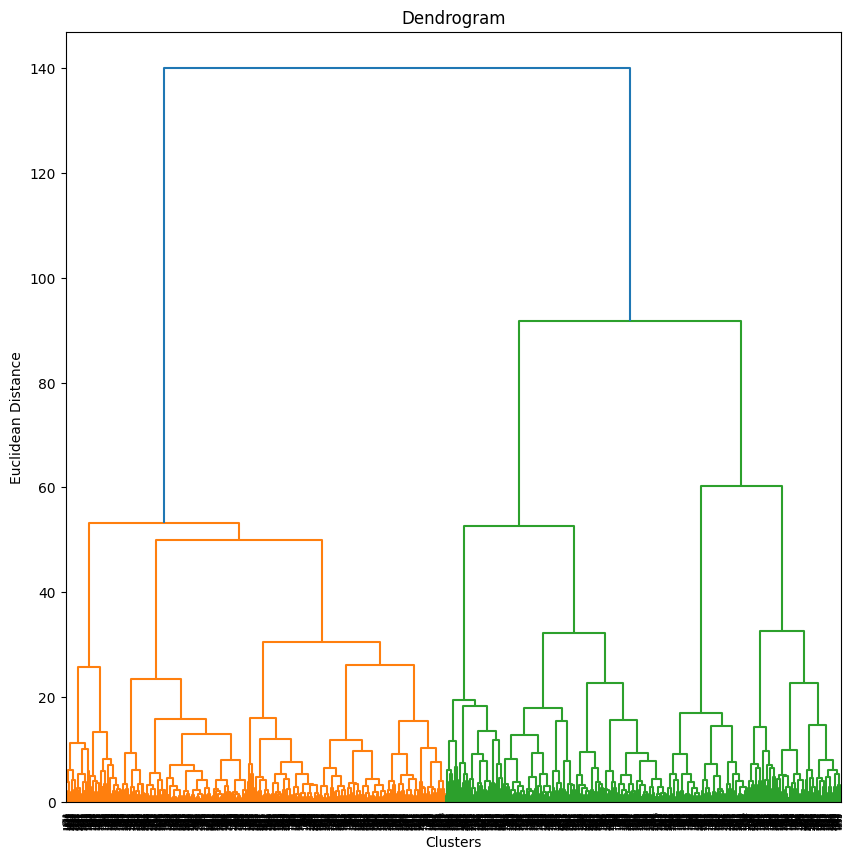

In [140]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca4, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [141]:
agglomerative_model_c2_pca4 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca4 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4_pca4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c5_pca4 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_model_c6_pca4 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_model_c7_pca4 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agglomerative_model_c8_pca4 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agglomerative_model_c9_pca4 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2_pca4 = agglomerative_model_c2_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c3_pca4 = agglomerative_model_c3_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c4_pca4 = agglomerative_model_c4_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c5_pca4 = agglomerative_model_c5_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c6_pca4 = agglomerative_model_c6_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c7_pca4 = agglomerative_model_c7_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c8_pca4 = agglomerative_model_c8_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)
y_c9_pca4 = agglomerative_model_c9_pca4.fit_predict(df_marketing_campaign_num_scaled_pca4)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c2_pca4)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c3_pca4)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c4_pca4)}')
print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c5_pca4)}')
print(f'6 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c6_pca4)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c7_pca4)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c8_pca4)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca4,y_c9_pca4)}')

df_marketing_campaign['ac_pca4'] = y_c4_pca4

2 clusters: 0.3217764445041746
3 clusters: 0.3211509712265839
4 clusters: 0.30492072718629853
5 clusters: 0.29012906668464794
6 clusters: 0.3040640415384901
7 clusters: 0.2663612401083071
8 clusters: 0.2616890556302152
9 clusters: 0.24380464326746817


ac_pca4


0    1078
2     628
1     265
3     224
Name: ac_pca4, dtype: int64


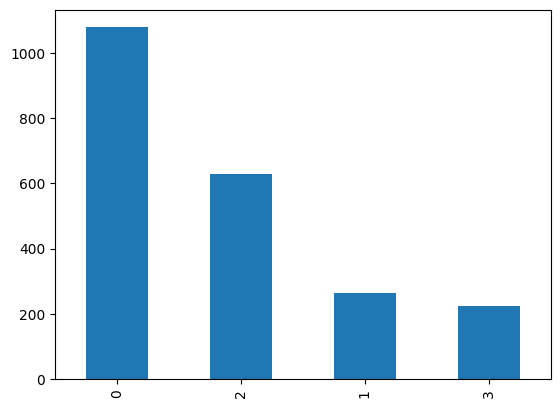

In [142]:
print('ac_pca4')
print('\n')
print(df_marketing_campaign['ac_pca4'].value_counts())
df_marketing_campaign['ac_pca4'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### 5 PCA

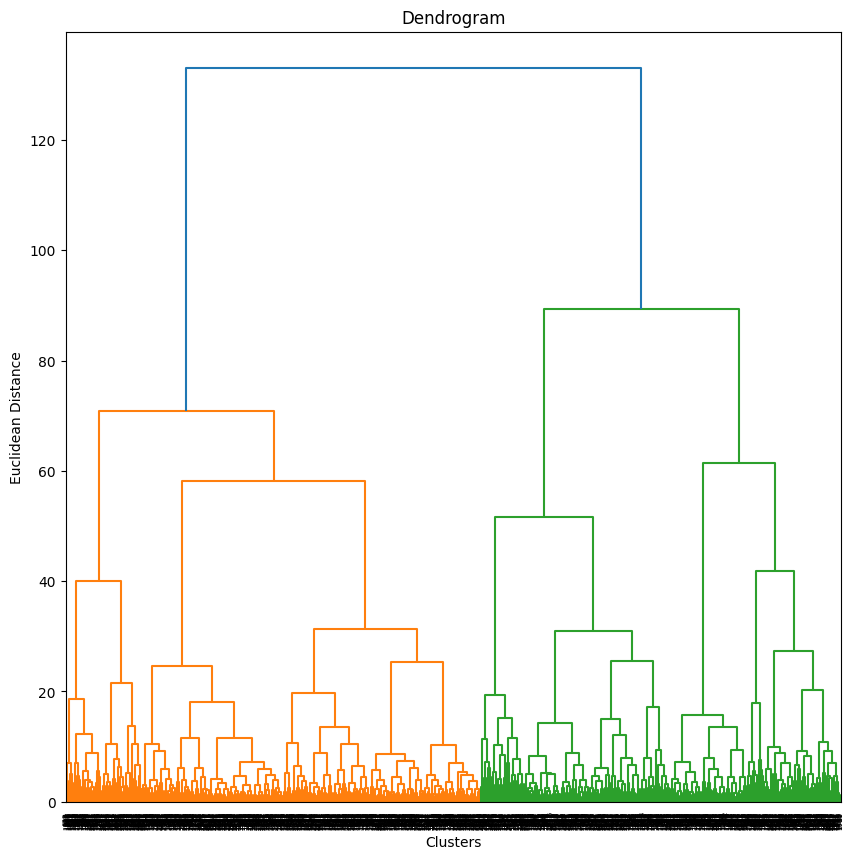

In [143]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca5, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [144]:
agglomerative_model_c2_pca5 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3_pca5 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4_pca5 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c5_pca5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_model_c6_pca5 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_model_c7_pca5 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agglomerative_model_c8_pca5 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agglomerative_model_c9_pca5 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2_pca5 = agglomerative_model_c2_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c3_pca5 = agglomerative_model_c3_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c4_pca5 = agglomerative_model_c4_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c5_pca5 = agglomerative_model_c5_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c6_pca5 = agglomerative_model_c6_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c7_pca5 = agglomerative_model_c7_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c8_pca5 = agglomerative_model_c8_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)
y_c9_pca5 = agglomerative_model_c9_pca5.fit_predict(df_marketing_campaign_num_scaled_pca5)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c2_pca5)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c3_pca5)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c4_pca5)}')
print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c5_pca5)}')
print(f'6 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c6_pca5)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c7_pca5)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c8_pca5)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca5,y_c9_pca5)}')

df_marketing_campaign['ac_pca5'] = y_c4_pca5

2 clusters: 0.2831040047676887
3 clusters: 0.2648447515896676
4 clusters: 0.287126188751913
5 clusters: 0.2735054813028193
6 clusters: 0.22411405972274187
7 clusters: 0.2421818582804506
8 clusters: 0.2495487560312842
9 clusters: 0.2605286100660638


ac_pca5


1    961
2    535
0    483
3    216
Name: ac_pca5, dtype: int64


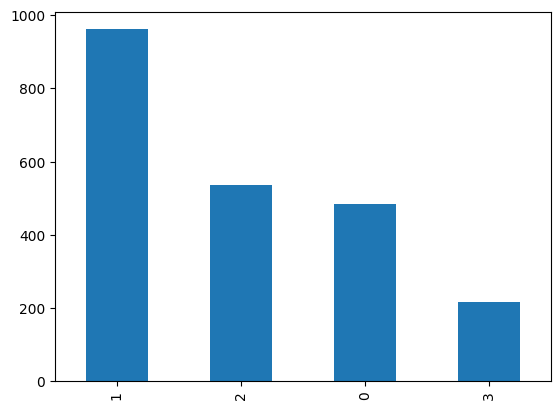

In [145]:
print('ac_pca5')
print('\n')
print(df_marketing_campaign['ac_pca5'].value_counts())
df_marketing_campaign['ac_pca5'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### Without PCA

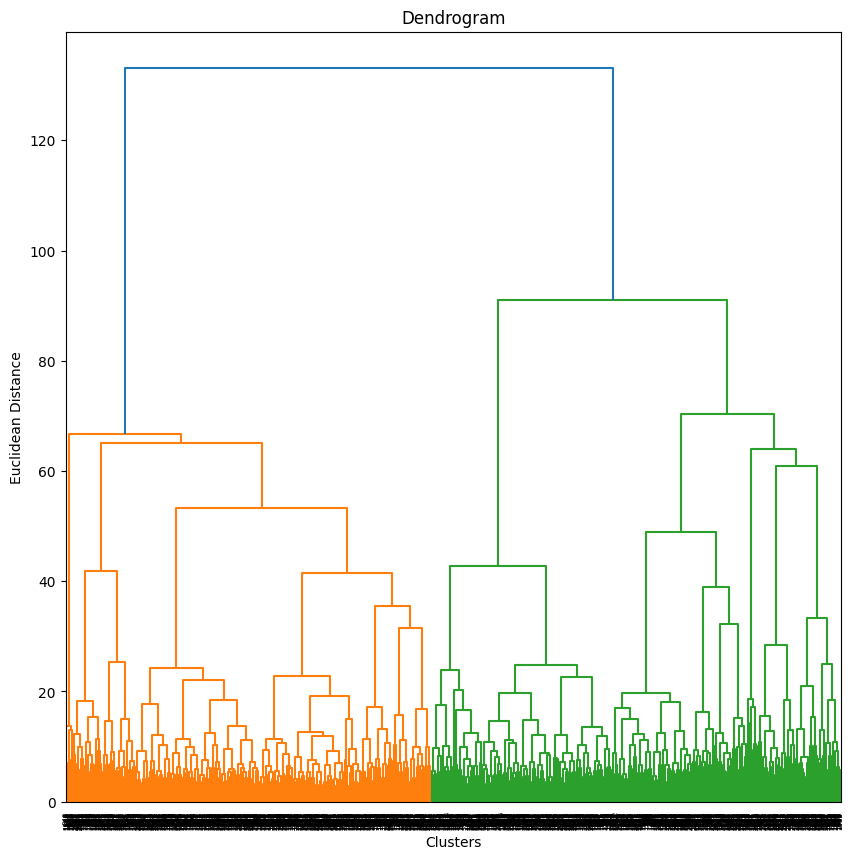

In [146]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [147]:
agglomerative_model_c2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglomerative_model_c3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative_model_c4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_model_c5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative_model_c6 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative_model_c7 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agglomerative_model_c8 = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agglomerative_model_c9 = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')

y_c2 = agglomerative_model_c2.fit_predict(df_marketing_campaign_num_scaled)
y_c3 = agglomerative_model_c3.fit_predict(df_marketing_campaign_num_scaled)
y_c4 = agglomerative_model_c4.fit_predict(df_marketing_campaign_num_scaled)
y_c5 = agglomerative_model_c5.fit_predict(df_marketing_campaign_num_scaled)
y_c6 = agglomerative_model_c6.fit_predict(df_marketing_campaign_num_scaled)
y_c7 = agglomerative_model_c7.fit_predict(df_marketing_campaign_num_scaled)
y_c8 = agglomerative_model_c8.fit_predict(df_marketing_campaign_num_scaled)
y_c9 = agglomerative_model_c9.fit_predict(df_marketing_campaign_num_scaled)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c2)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c3)}')
print(f'4 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c4)}')
print(f'5 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c5)}')
print(f'6 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c6)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c7)}')
print(f'8 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c8)}')
print(f'9 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c9)}')

df_marketing_campaign['ac'] = y_c4

2 clusters: 0.15330017044384575
3 clusters: 0.09962914675411501
4 clusters: 0.10969784707739966
5 clusters: 0.12137774292551805
6 clusters: 0.13498362556135107
7 clusters: 0.1446873917696587
8 clusters: 0.1589456874371908
9 clusters: 0.11146151134517701


In [ ]:
print('ac')
print('\n')
print(df_marketing_campaign['ac'].value_counts())
df_marketing_campaign['ac'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## DBSCAN

### 2 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca2)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca2)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(0.1, 1, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca2)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca2,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=0.2, min_samples=7)
y_dbscan_pca2 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca2)

print(silhouette_score(df_marketing_campaign_num_scaled_pca2, y_dbscan_pca2))
df_marketing_campaign['DBSCAN_pca2'] = y_dbscan_pca2

In [ ]:
print('DBSCAN_pca2')
print('\n')
print(df_marketing_campaign['DBSCAN_pca2'].value_counts())
df_marketing_campaign['DBSCAN_pca2'].value_counts().plot(kind='bar')
plt.show()
print('\n')

In [ ]:
fig_2d = px.scatter(
    df_marketing_campaign_num_scaled_pca2, x=0, y=1,
    color=y_dbscan_pca2, labels={'color': 'class'}
)

fig_2d.show()

In [ ]:
sns.scatterplot(
    df_marketing_campaign_num_scaled_pca2, 
    x=0, 
    y=1,
    hue=y_dbscan_pca2,
    alpha=0.4,
    s=40
)

### 3 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca3)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca3)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(0.3, 1.3, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca3)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca3,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=1.2, min_samples=4)
y_dbscan_pca3 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca3)

print(silhouette_score(df_marketing_campaign_num_scaled_pca3, y_dbscan_pca3))
df_marketing_campaign['DBSCAN_pca3'] = y_dbscan_pca3

In [ ]:
print('DBSCAN_pca3')
print('\n')
print(df_marketing_campaign['DBSCAN_pca3'].value_counts())
df_marketing_campaign['DBSCAN_pca3'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### 4 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca4)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca4)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(0.5, 1.5, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca4)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca4,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=1.4, min_samples=6)
y_dbscan_pca4 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca4)

print(silhouette_score(df_marketing_campaign_num_scaled_pca4, y_dbscan_pca4))
df_marketing_campaign['DBSCAN_pca4'] = y_dbscan_pca4

In [ ]:
print('DBSCAN_pca4')
print('\n')
print(df_marketing_campaign['DBSCAN_pca4'].value_counts())
df_marketing_campaign['DBSCAN_pca4'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### 5 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca5)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca5)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(1, 2, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca5)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca5,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=1.9, min_samples=3)
y_dbscan_pca5 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca5)

print(silhouette_score(df_marketing_campaign_num_scaled_pca5, y_dbscan_pca5))
df_marketing_campaign['DBSCAN_pca5'] = y_dbscan_pca5

In [ ]:
print('DBSCAN_pca5')
print('\n')
print(df_marketing_campaign['DBSCAN_pca5'].value_counts())
df_marketing_campaign['DBSCAN_pca5'].value_counts().plot(kind='bar')
plt.show()
print('\n')

### Without PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(4, 6, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(26,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=5.9, min_samples=6)
y_dbscan = dbscan_model.fit_predict(df_marketing_campaign_num_scaled)

print(silhouette_score(df_marketing_campaign_num_scaled, y_dbscan))
df_marketing_campaign['DBSCAN'] = y_dbscan

In [ ]:
print('DBSCAN')
print('\n')
print(df_marketing_campaign['DBSCAN'].value_counts())
df_marketing_campaign['DBSCAN'].value_counts().plot(kind='bar')
plt.show()
print('\n')

## Evaluation

In [130]:
df_marketing_campaign.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Decade_Born', 'Education_int',
       'WithPartner', 'Dt_Customer_diff_days', 'MntTotalSpent',
       'NumTotalPurchases', 'AcceptedOfferAnyCmp', 'IsParent',
       'ProductMostSpent', 'ProductLeastSpent', 'ProductMostSpent_int',
       'ProductLeastSpent_int', 'kmeans_pca2', 'ac_pca2'],
      dtype='object')

In [131]:
df_marketing_campaign_num.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Decade_Born',
       'Education_int', 'WithPartner', 'Dt_Customer_diff_days',
       'MntTotalSpent', 'NumTotalPurchases', 'AcceptedOfferAnyCmp', 'IsParent',
       'ProductMostSpent_int', 'ProductLeastSpent_int'],
      dtype='object')

### K-Means

In [156]:
df_marketing_campaign['kmeans_pca2'].value_counts()

0    986
1    696
2    513
Name: kmeans_pca2, dtype: int64

In [157]:
df_aux_displot = df_marketing_campaign[['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Decade_Born',
       'Education_int', 'WithPartner', 'Dt_Customer_diff_days',
       'MntTotalSpent', 'NumTotalPurchases', 'AcceptedOfferAnyCmp', 'IsParent',
       'ProductMostSpent_int', 'ProductLeastSpent_int', 'kmeans_pca2']].copy()

In [158]:
df_aux_displot = pd.concat([df_aux_displot, df_saved_columns], axis=1)
df_marketing_campaign = pd.concat([df_marketing_campaign, df_saved_columns], axis=1)
column_to_move = df_aux_displot.pop("kmeans_pca2")
df_aux_displot.insert(len(df_aux_displot.columns), "kmeans_pca2", column_to_move)

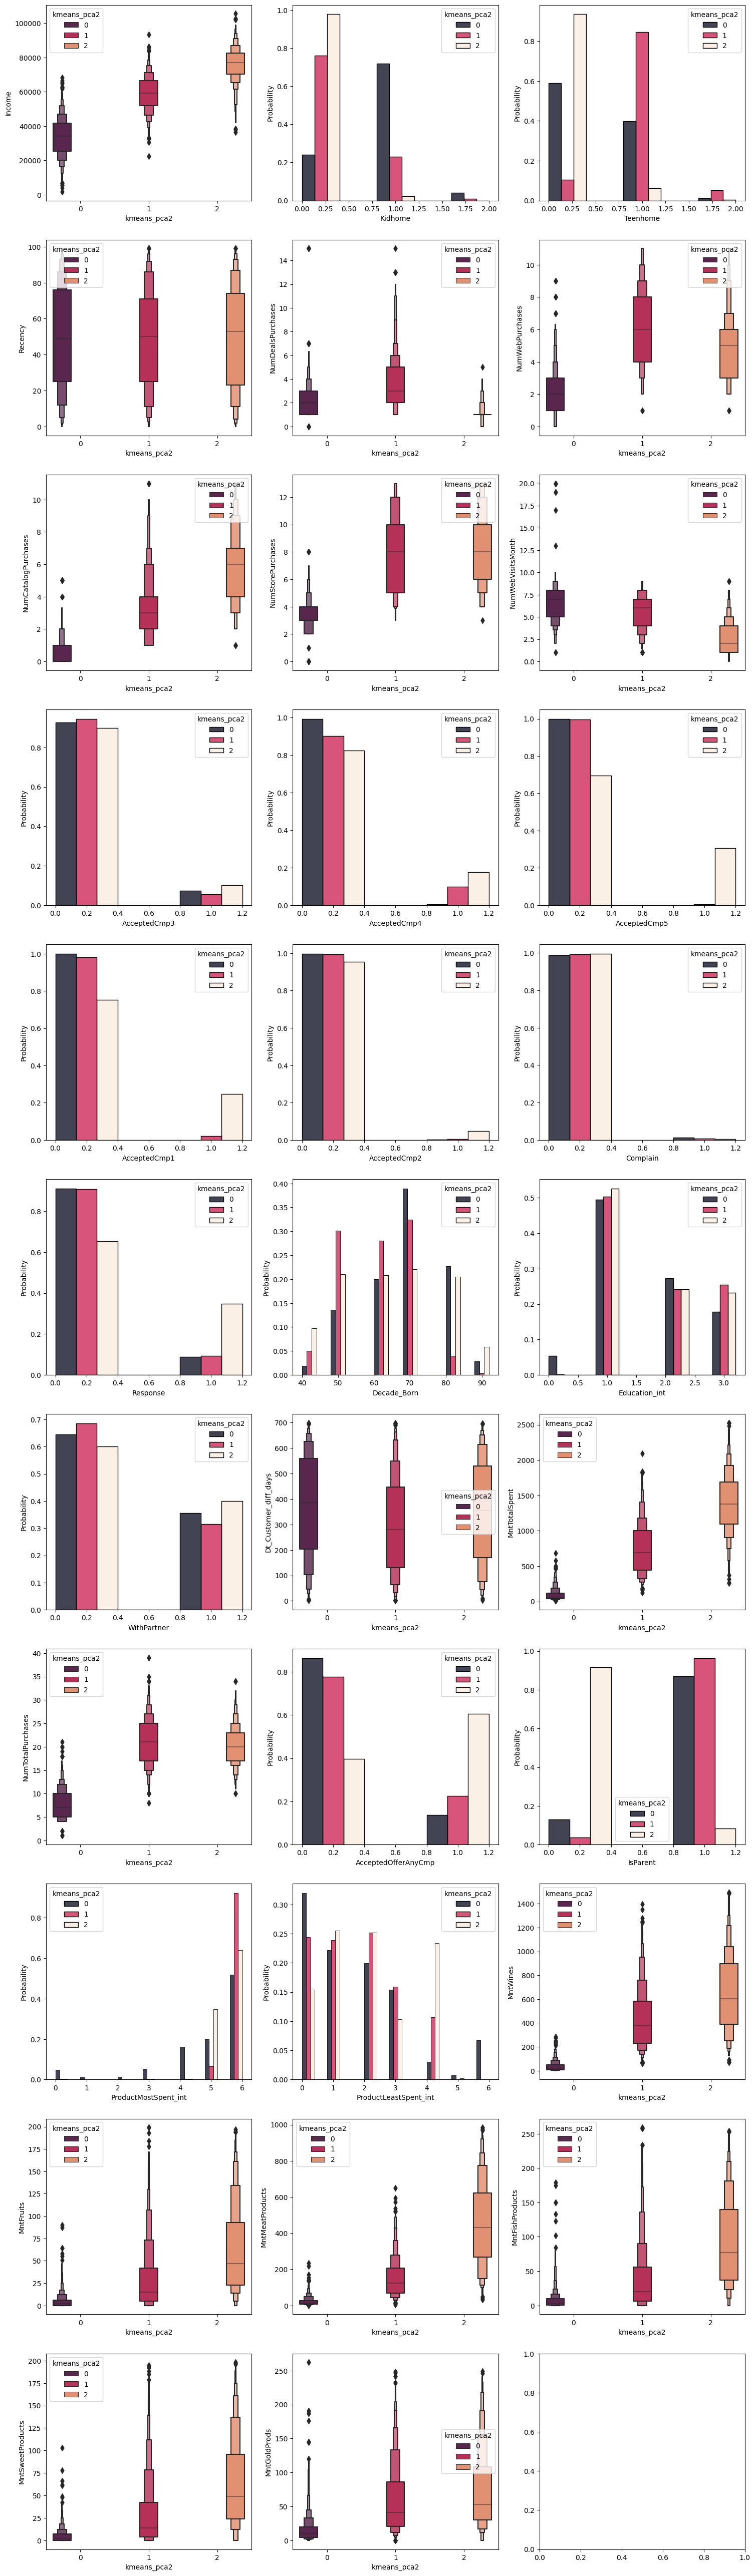

In [164]:
n_cols =  3
n_rows = int(np.ceil(((df_aux_displot.shape[1]-1) / n_cols)))
# # Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
# print(fig)
for i, column in enumerate(df_aux_displot.columns):
       if column == 'kmeans_pca2':
              continue
       if(len(df_marketing_campaign[column].unique()) <= 10):
              var_binwidth=0.4
              if column == 'Decade_Born':
                     var_binwidth=4
              # sns.countplot(
              sns.histplot(
                     df_marketing_campaign[[column,'kmeans_pca2']], 
                     # x = "kmeans_pca2",
                     x = column,
                     hue="kmeans_pca2", 
                     multiple="dodge",
                     stat = 'probability',
                     common_norm=False,
                     binwidth=var_binwidth,
                     # fill=True,
                     palette='rocket',
                     ax=axes[i//n_cols,i%n_cols],
                     # warn_singular=False
              )
       else:
              sns.boxenplot(
                     df_marketing_campaign[[column,'kmeans_pca2']], 
                     x = "kmeans_pca2",
                     y = column,
                     hue="kmeans_pca2", 
                     # fill=True,
                     palette='rocket',
                     ax=axes[i//n_cols,i%n_cols],
                     # warn_singular=False
              )

In [165]:
fig_2d = px.scatter(
    df_marketing_campaign_num_scaled_pca2, x=0, y=1,
    color=kmeans_model_pca2.labels_, labels={'color': 'class'}
)

fig_2d.show()

#### Correlations more than 0.5

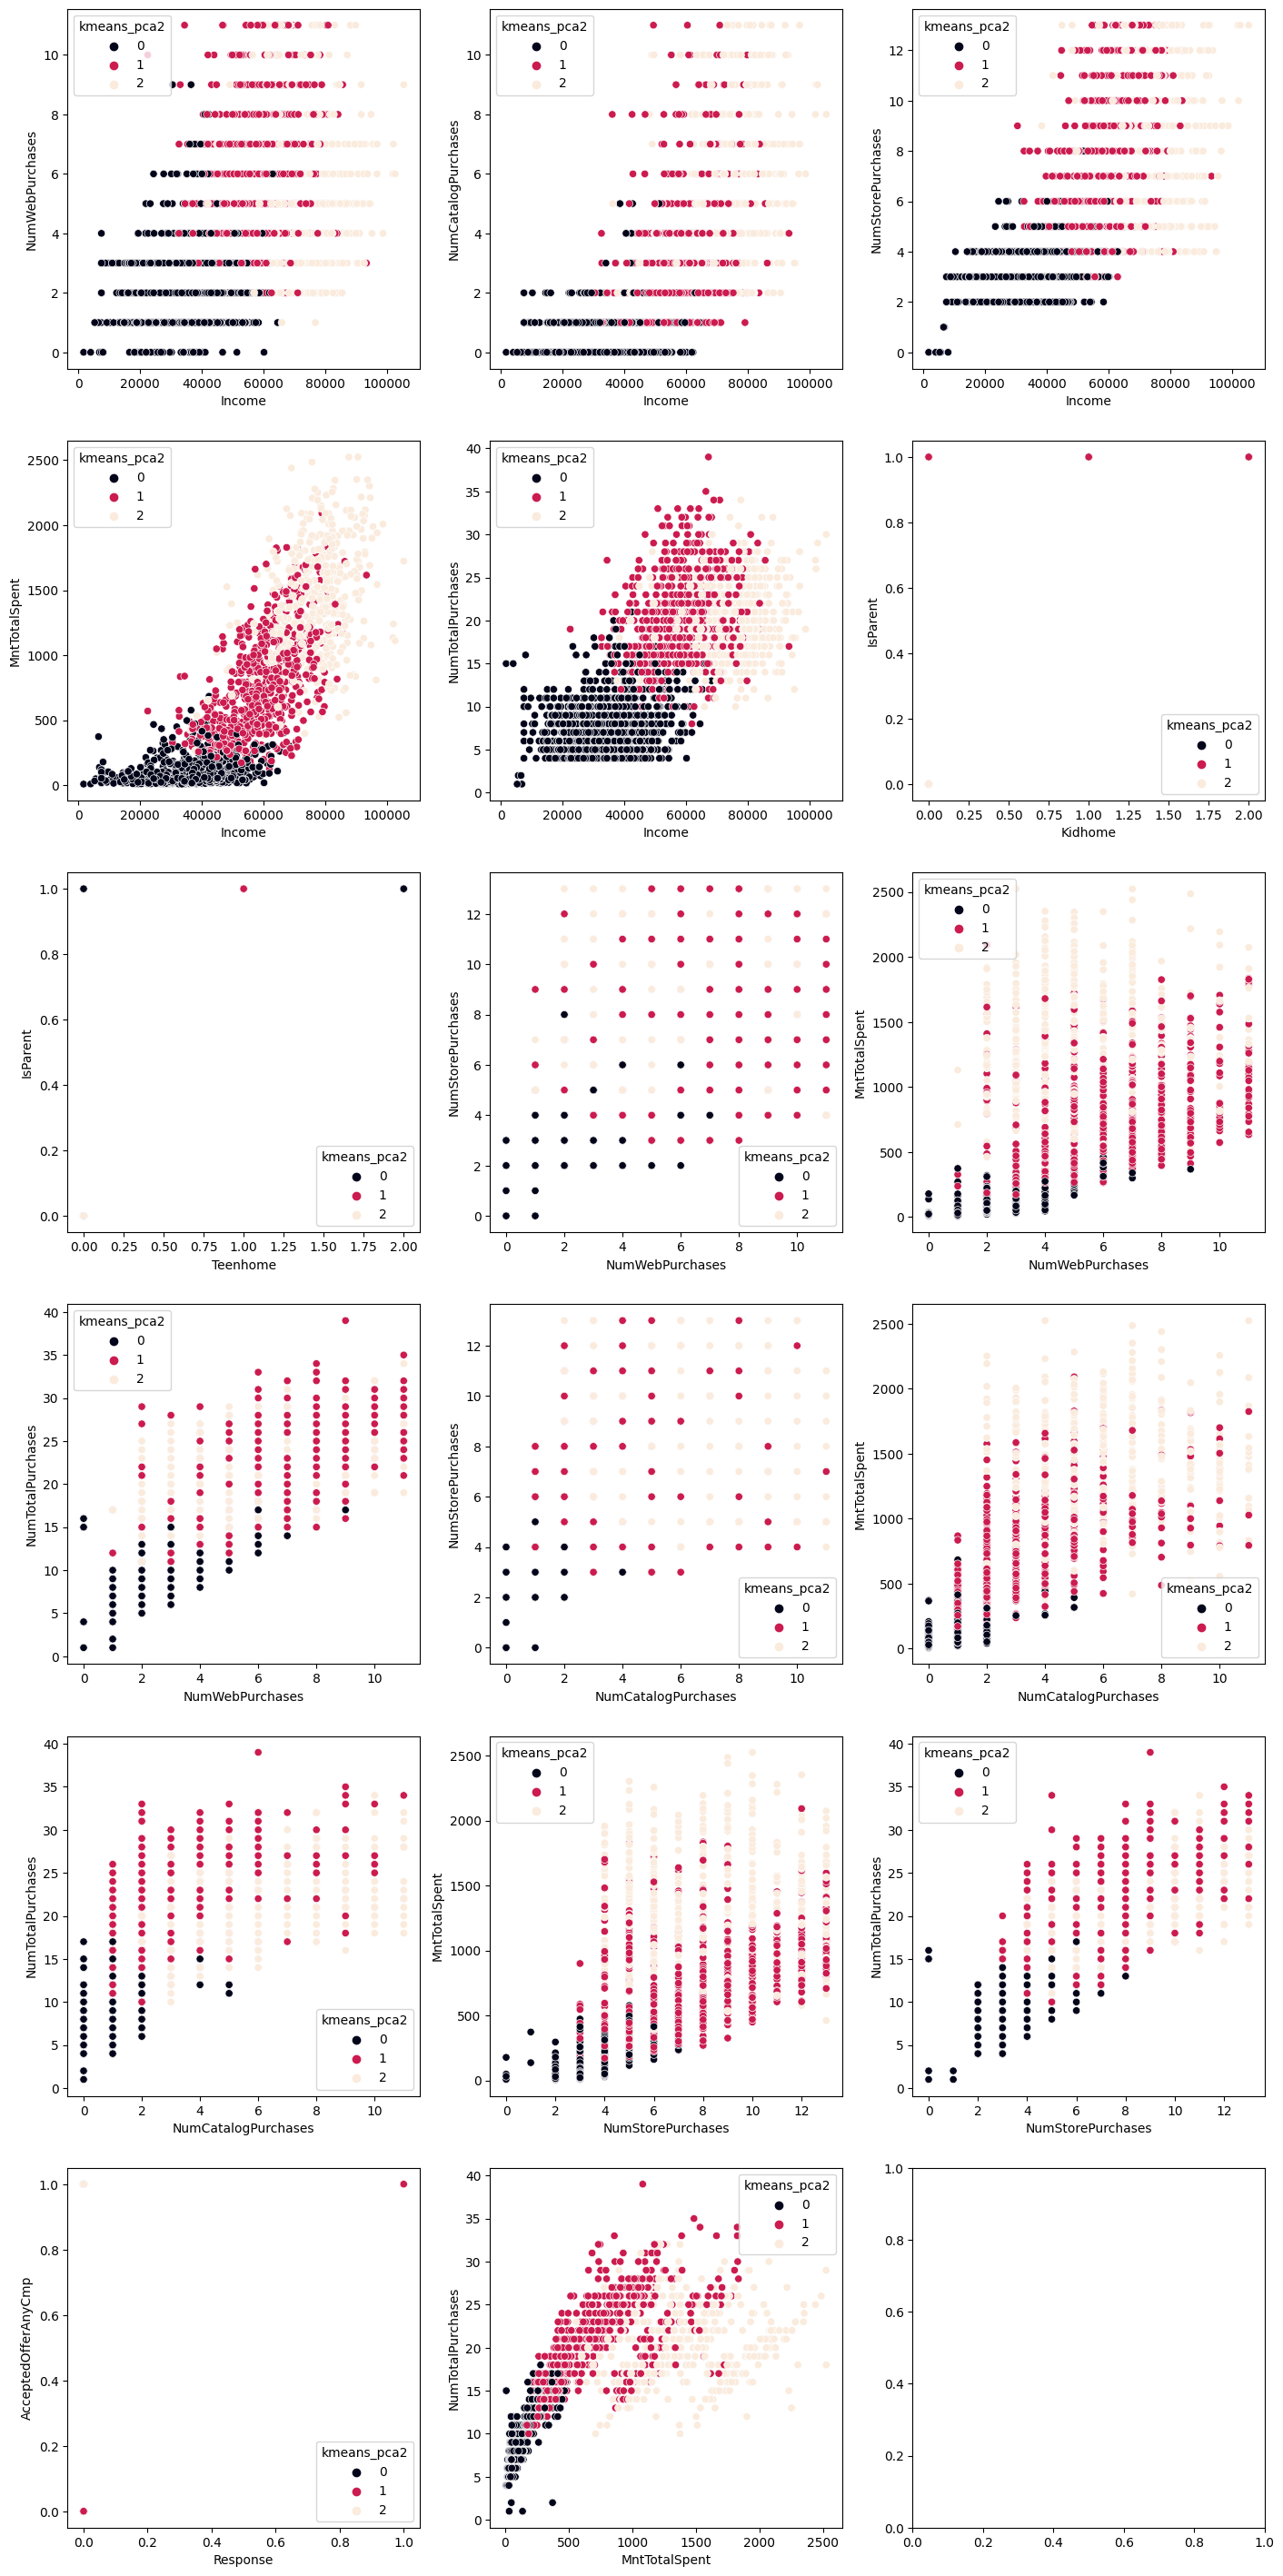

In [166]:

matrix = df_marketing_campaign_num.corr()
_ = np.round(matrix[(matrix > 0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix[:] = _
dict_corr_greater_05 = dict(matrix.stack().items())

n_cols =  3
n_rows = int(np.ceil((len(dict_corr_greater_05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_greater_05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y, 'kmeans_pca2']], 
              x=x, 
              y=y,
              hue='kmeans_pca2',
              palette='rocket',
              ax=axes[i//n_cols,i%n_cols]
       )

#### Correlations less than - 0.5

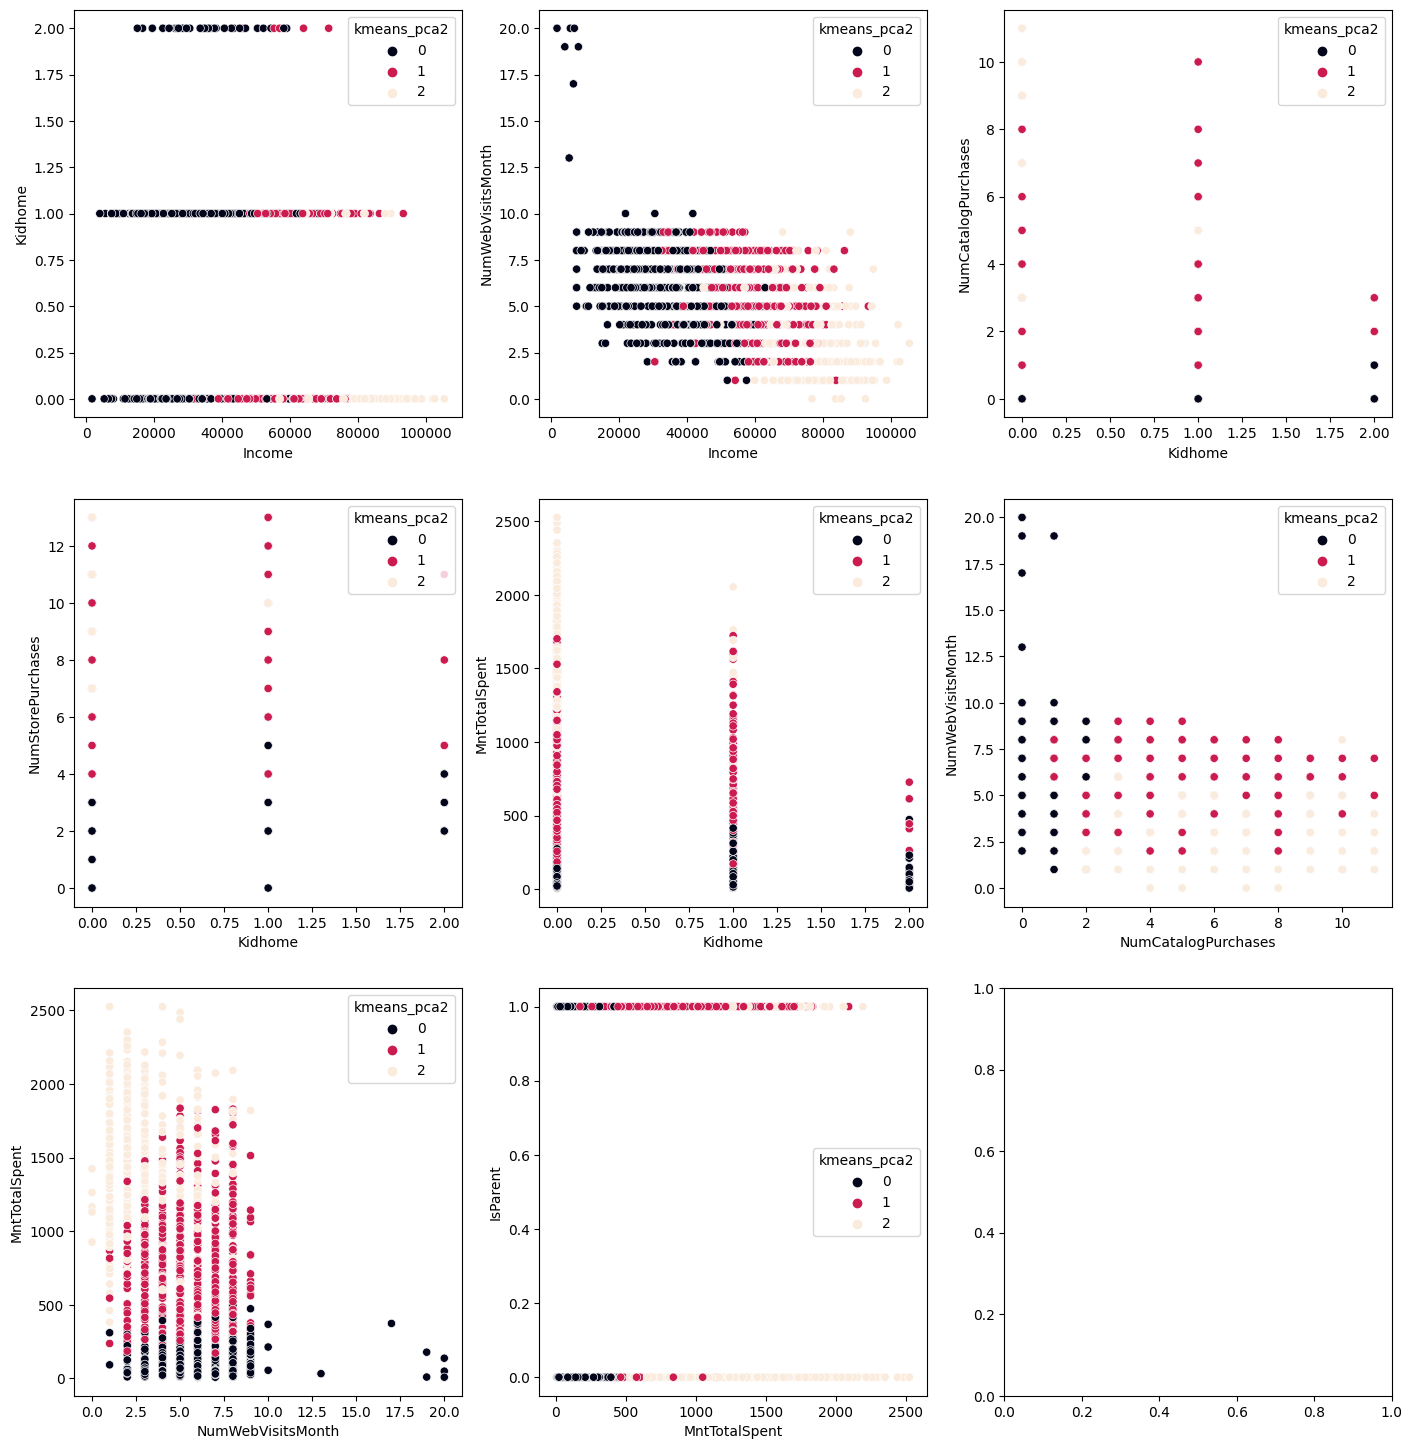

In [167]:

matrix = df_marketing_campaign_num.corr()
_ = np.round(matrix[(matrix < -0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix[:] = _
dict_corr_less_minus05 = dict(matrix.stack().items())

n_cols =  3
n_rows = int(np.ceil((len(dict_corr_less_minus05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_less_minus05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y, 'kmeans_pca2']], 
              x=x, 
              y=y,
              hue='kmeans_pca2',
              palette='rocket',
              ax=axes[i//n_cols,i%n_cols]
       )

### Agglomerative Clustering

In [168]:
df_marketing_campaign['ac_pca2'].value_counts()

0    1088
1     562
2     545
Name: ac_pca2, dtype: int64

In [169]:
df_aux_displot = df_marketing_campaign[['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Decade_Born',
       'Education_int', 'WithPartner', 'Dt_Customer_diff_days',
       'MntTotalSpent', 'NumTotalPurchases', 'AcceptedOfferAnyCmp', 'IsParent',
       'ProductMostSpent_int', 'ProductLeastSpent_int', 'ac_pca2']].copy()

In [170]:
df_aux_displot = pd.concat([df_aux_displot, df_saved_columns_Mnt], axis=1)

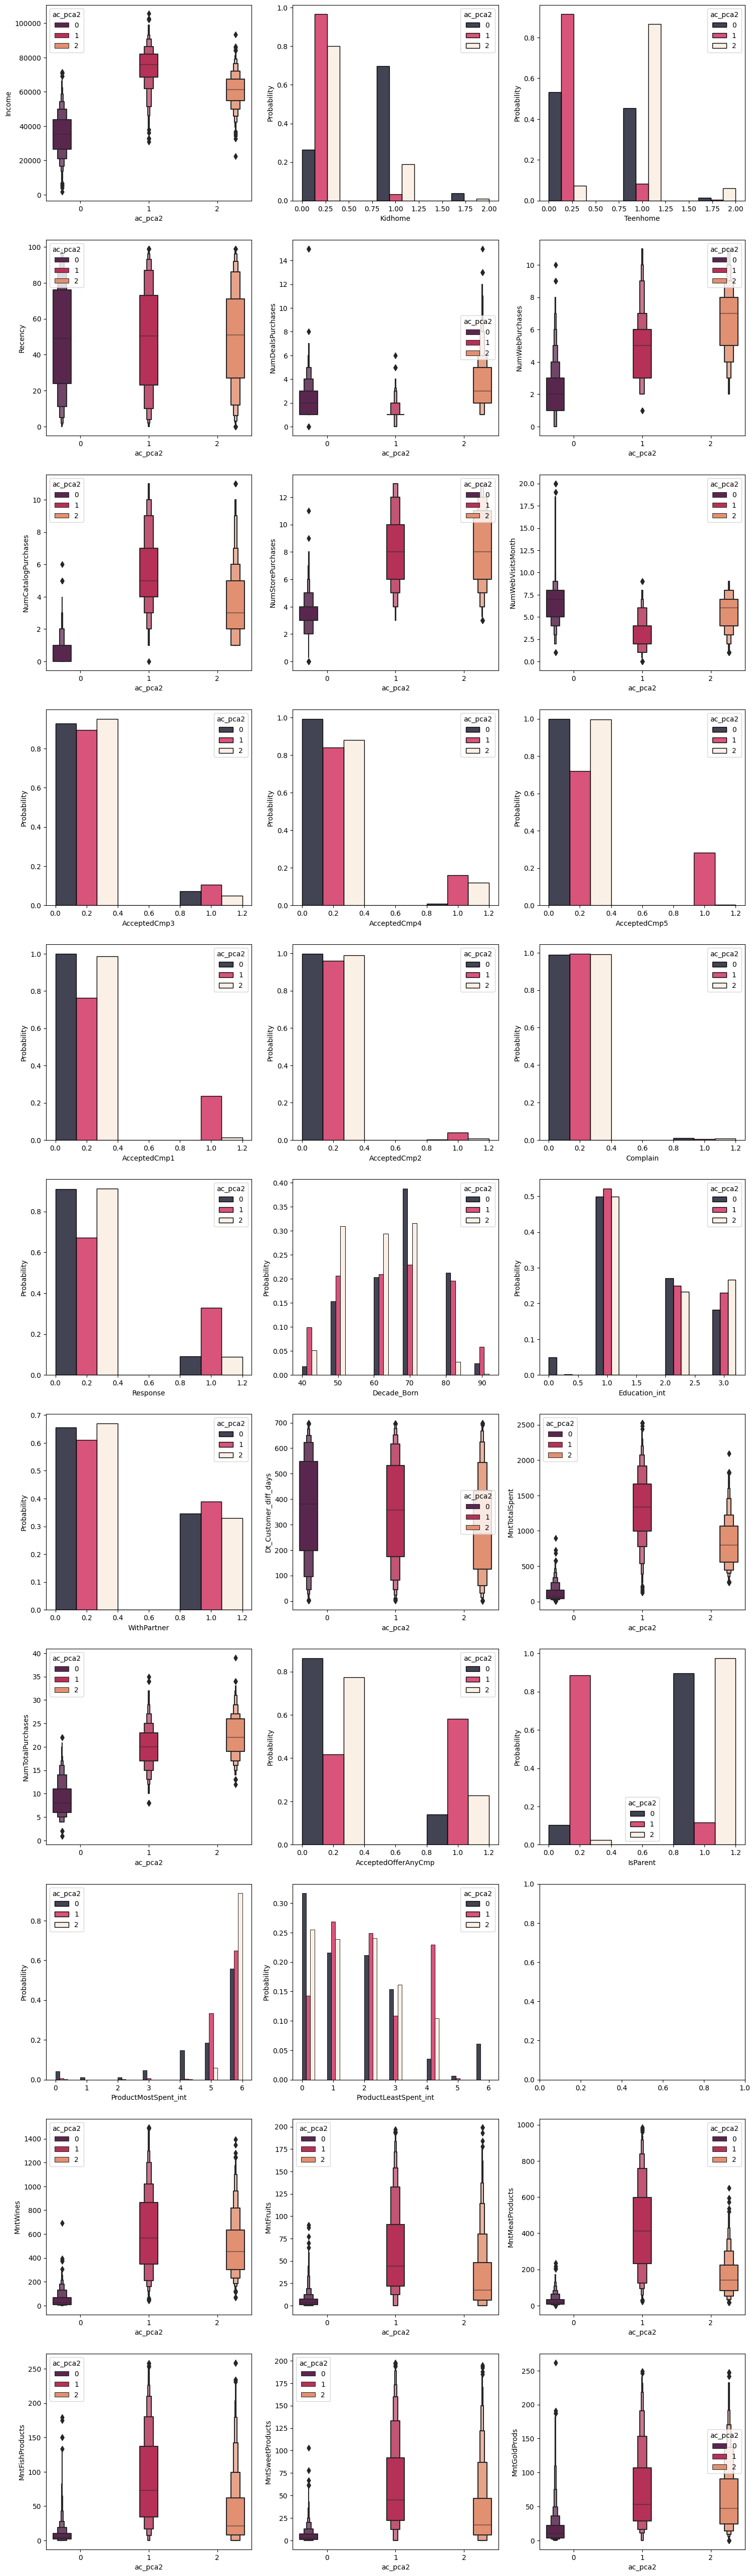

In [171]:
n_cols =  3
n_rows = int(np.ceil(((df_aux_displot.shape[1]-1) / n_cols)))
# # Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
# print(fig)
for i, column in enumerate(df_aux_displot.columns):
       if column == 'ac_pca2':
              continue
       if(len(df_marketing_campaign[column].unique()) <= 10):
              var_binwidth=0.4
              if column == 'Decade_Born':
                     var_binwidth=4
              # sns.countplot(
              sns.histplot(
                     df_marketing_campaign[[column,'ac_pca2']], 
                     # x = "ac_pca2",
                     x = column,
                     hue="ac_pca2", 
                     multiple="dodge",
                     stat = 'probability',
                     common_norm=False,
                     binwidth=var_binwidth,
                     # fill=True,
                     palette='rocket',
                     ax=axes[i//n_cols,i%n_cols],
                     # warn_singular=False
              )
       else:
              sns.boxenplot(
                     df_marketing_campaign[[column,'ac_pca2']], 
                     x = "ac_pca2",
                     y = column,
                     hue="ac_pca2", 
                     # fill=True,
                     palette='rocket',
                     ax=axes[i//n_cols,i%n_cols],
                     # warn_singular=False
              )

In [172]:
fig_2d = px.scatter(
    df_marketing_campaign_num_scaled_pca2, x=0, y=1,
    color=agglomerative_model_c3_pca2.labels_, labels={'color': 'class'}
)

fig_2d.show()

#### Correlations more than 0.5

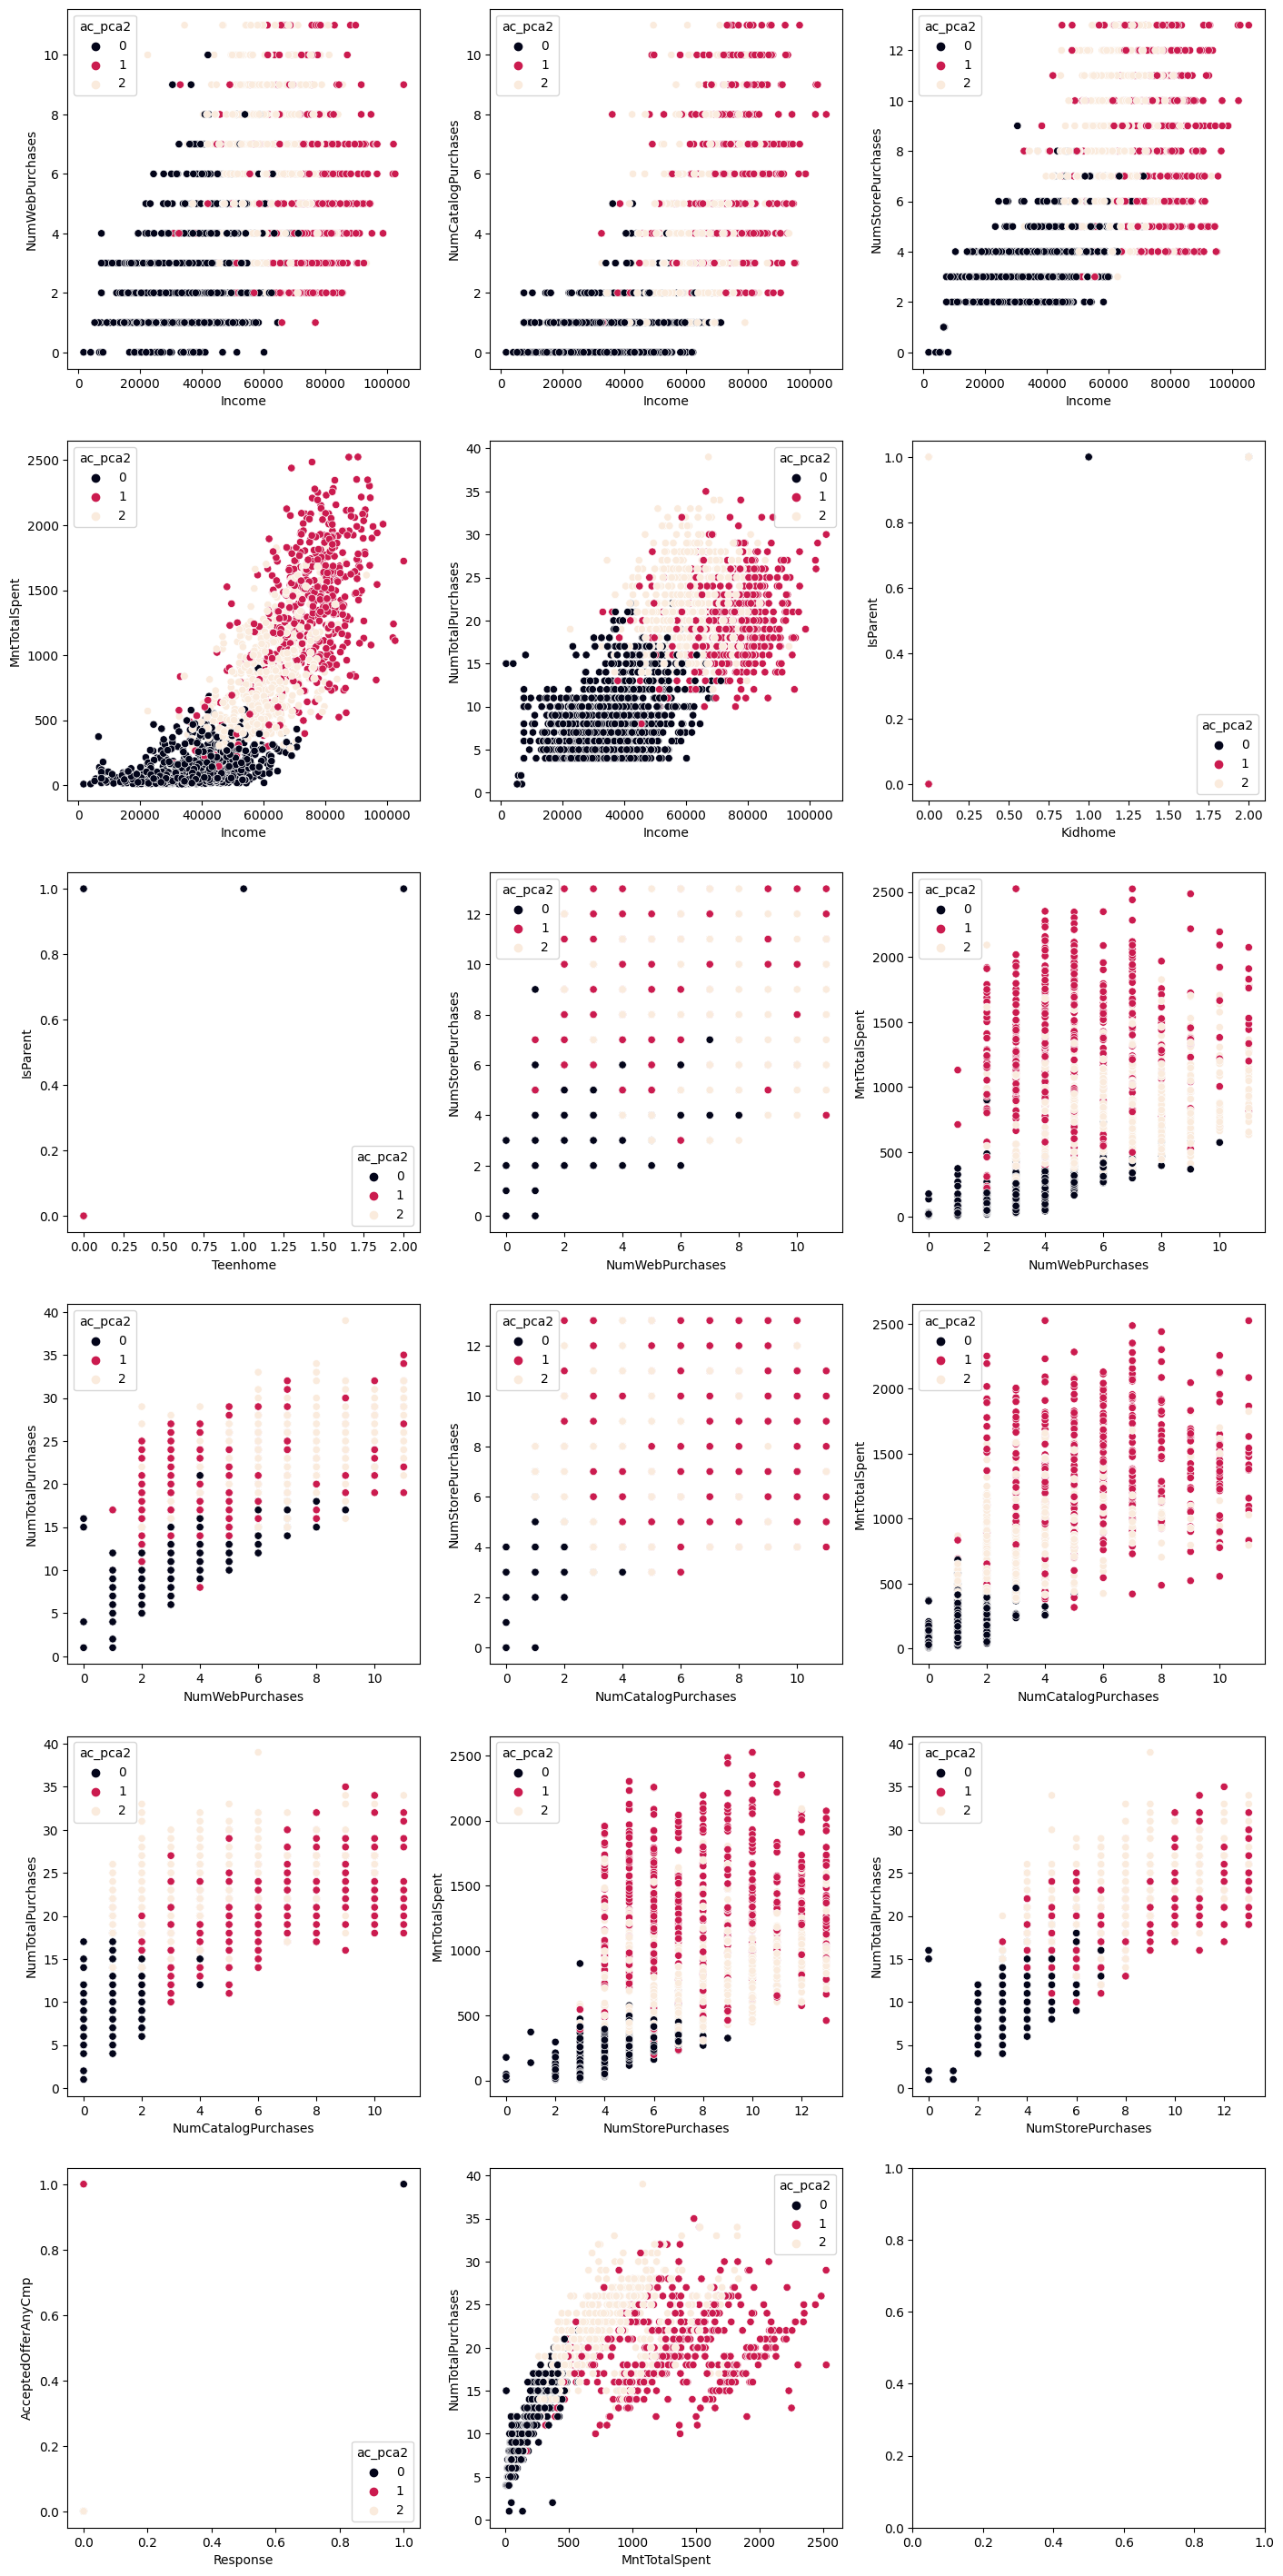

In [173]:

matrix = df_marketing_campaign_num.corr()
_ = np.round(matrix[(matrix > 0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix[:] = _
dict_corr_greater_05 = dict(matrix.stack().items())

n_cols =  3
n_rows = int(np.ceil((len(dict_corr_greater_05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_greater_05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y, 'ac_pca2']], 
              x=x, 
              y=y,
              hue='ac_pca2',
              palette='rocket',
              ax=axes[i//n_cols,i%n_cols]
       )

#### Correlations less than - 0.5

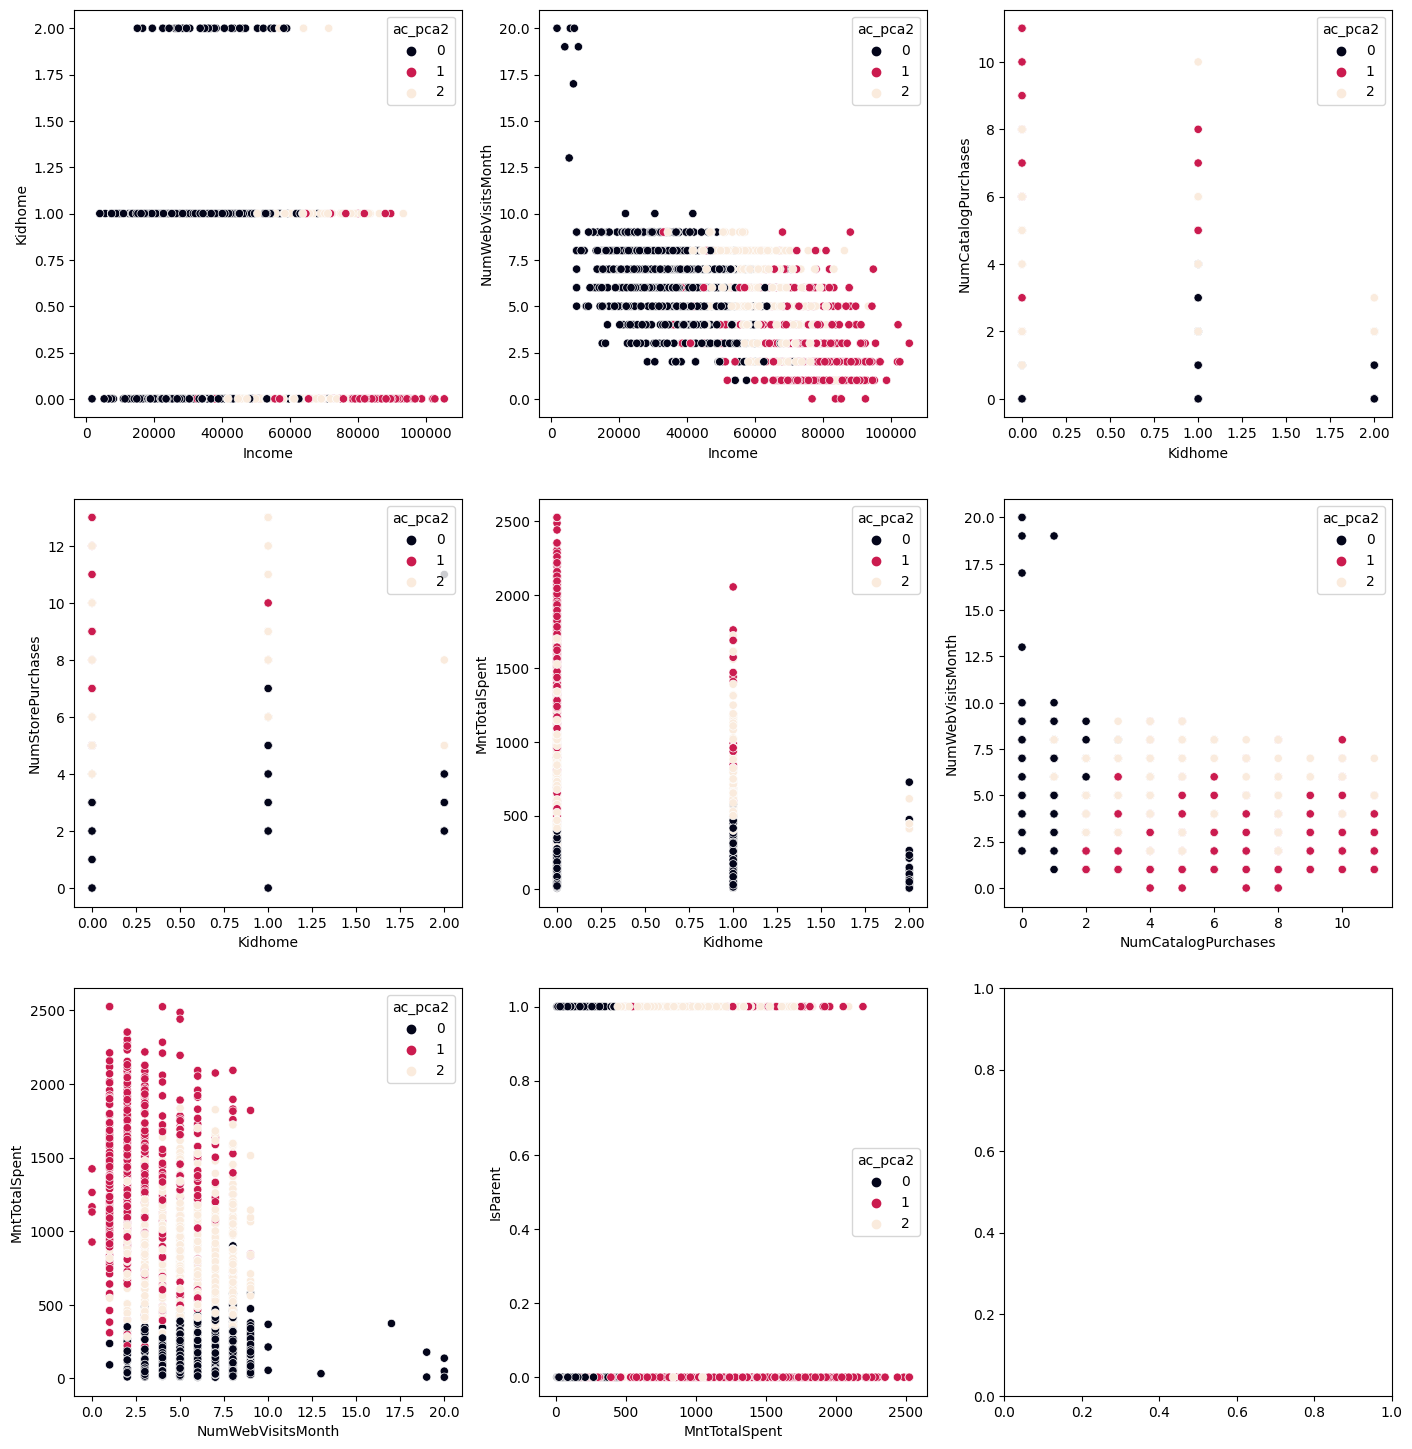

In [174]:

matrix = df_marketing_campaign_num.corr()
_ = np.round(matrix[(matrix < -0.5)].values, 2)
_[np.tril_indices(_.shape[0], 0)] = np.nan
matrix[:] = _
dict_corr_less_minus05 = dict(matrix.stack().items())

n_cols =  3
n_rows = int(np.ceil((len(dict_corr_less_minus05) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(17, (n_rows*6)))

for i, ((x, y), value) in enumerate(dict_corr_less_minus05.items()):
       sns.scatterplot(
              data=df_marketing_campaign[[x, y, 'ac_pca2']], 
              x=x, 
              y=y,
              hue='ac_pca2',
              palette='rocket',
              ax=axes[i//n_cols,i%n_cols]
       )